In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from utility import *
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
import random
random.seed(2)

## Basic univariate data inspection

In [3]:
df_raw = pd.read_csv('data/raw/BankChurners.csv')
df_raw.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count   
0  768805383  Existing Customer            45      M                3  \
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category   
0     High School        Married     $60K - $80K          Blue  \
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy   
0              39  ...       12691.0                  777          11914.0  \
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1   
0                 1.335             1144              42                1.625  \
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio   
0                  0.061  \
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1   
0                                           0.000093                                                                                   \
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

We can see that the two last columns in the dataset are irrelevant, they were probably added when someone was trying to do classification using Naive Bayes. We can drop these.
Also, there is no need for the CLIENTNUM identificators (that were internal to the bank from which the data are collected). We will instead use simple id column as identifier.

In [5]:
# dropping irrelevant columns
df = df_raw.drop(axis='columns',columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'])

In [6]:
df['id'] = np.arange(df.shape[0])
first_col = df.pop('id')
df.insert(0, 'id', first_col)

In [7]:
df.dtypes

id                            int32
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
df.dtypes.value_counts()

int64      9
object     6
float64    5
int32      1
Name: count, dtype: int64

The dataset contains 15 numerical and 6 categorical variables

In [9]:
print('Dataset - rows:', df.shape[0], ' columns:', df.shape[1])


Dataset - rows: 10127  columns: 21


In [10]:
df.describe()

id  Customer_Age  Dependent_count  Months_on_book   
count  10127.000000  10127.000000     10127.000000    10127.000000  \
mean    5063.000000     46.325960         2.346203       35.928409   
std     2923.557422      8.016814         1.298908        7.986416   
min        0.000000     26.000000         0.000000       13.000000   
25%     2531.500000     41.000000         1.000000       31.000000   
50%     5063.000000     46.000000         2.000000       36.000000   
75%     7594.500000     52.000000         3.000000       40.000000   
max    10126.000000     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon   
count              10127.000000            10127.000000  \
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal   
count           10127.000000  10127.000000         10127.000000  \
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct   
count     10127.000000          10127.000000     10127.000000    10127.000000  \
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.

In [11]:
df['Attrition_Flag'].value_counts()


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [12]:
def visualize_distribution(df, column):
    # Initialise the subplot function using number of rows and columns
    fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(15, 5))
    fig.suptitle(column)
    ax[0].boxplot(df[column], vert=False)
    ax[1].hist(df[column], bins=(round(1 + 3.322 * math.log(len(df[column]), 10)))) # bins amount chosen by Sturge's rule
    fig.tight_layout()

def visualize_distribution_compact(df, numerical_columns):
    plt.figure(figsize=(28,40))
    b = 0
    for i in numerical_columns:
        b+=1
        plt.subplot(5,3,b)
        plt.hist(df[i])
        plt.title(i)


def visualize_distribution_cat(df, column):
    fig, ax = plt.subplots(1, tight_layout=True, figsize=(15, 5))
    fig.suptitle(column)
    df[column].value_counts(sort=False).plot(kind="bar", ax=ax)



In [13]:
numerical_columns = df._get_numeric_data().columns.to_list()
categorical_columns = list(set(df.columns) - set(numerical_columns))
numerical_columns.remove('id')
categorical_columns_indices = [df.columns.get_loc(c) for c in categorical_columns if c in df]
numerical_columns_indices = [df.columns.get_loc(c) for c in numerical_columns if c in df]


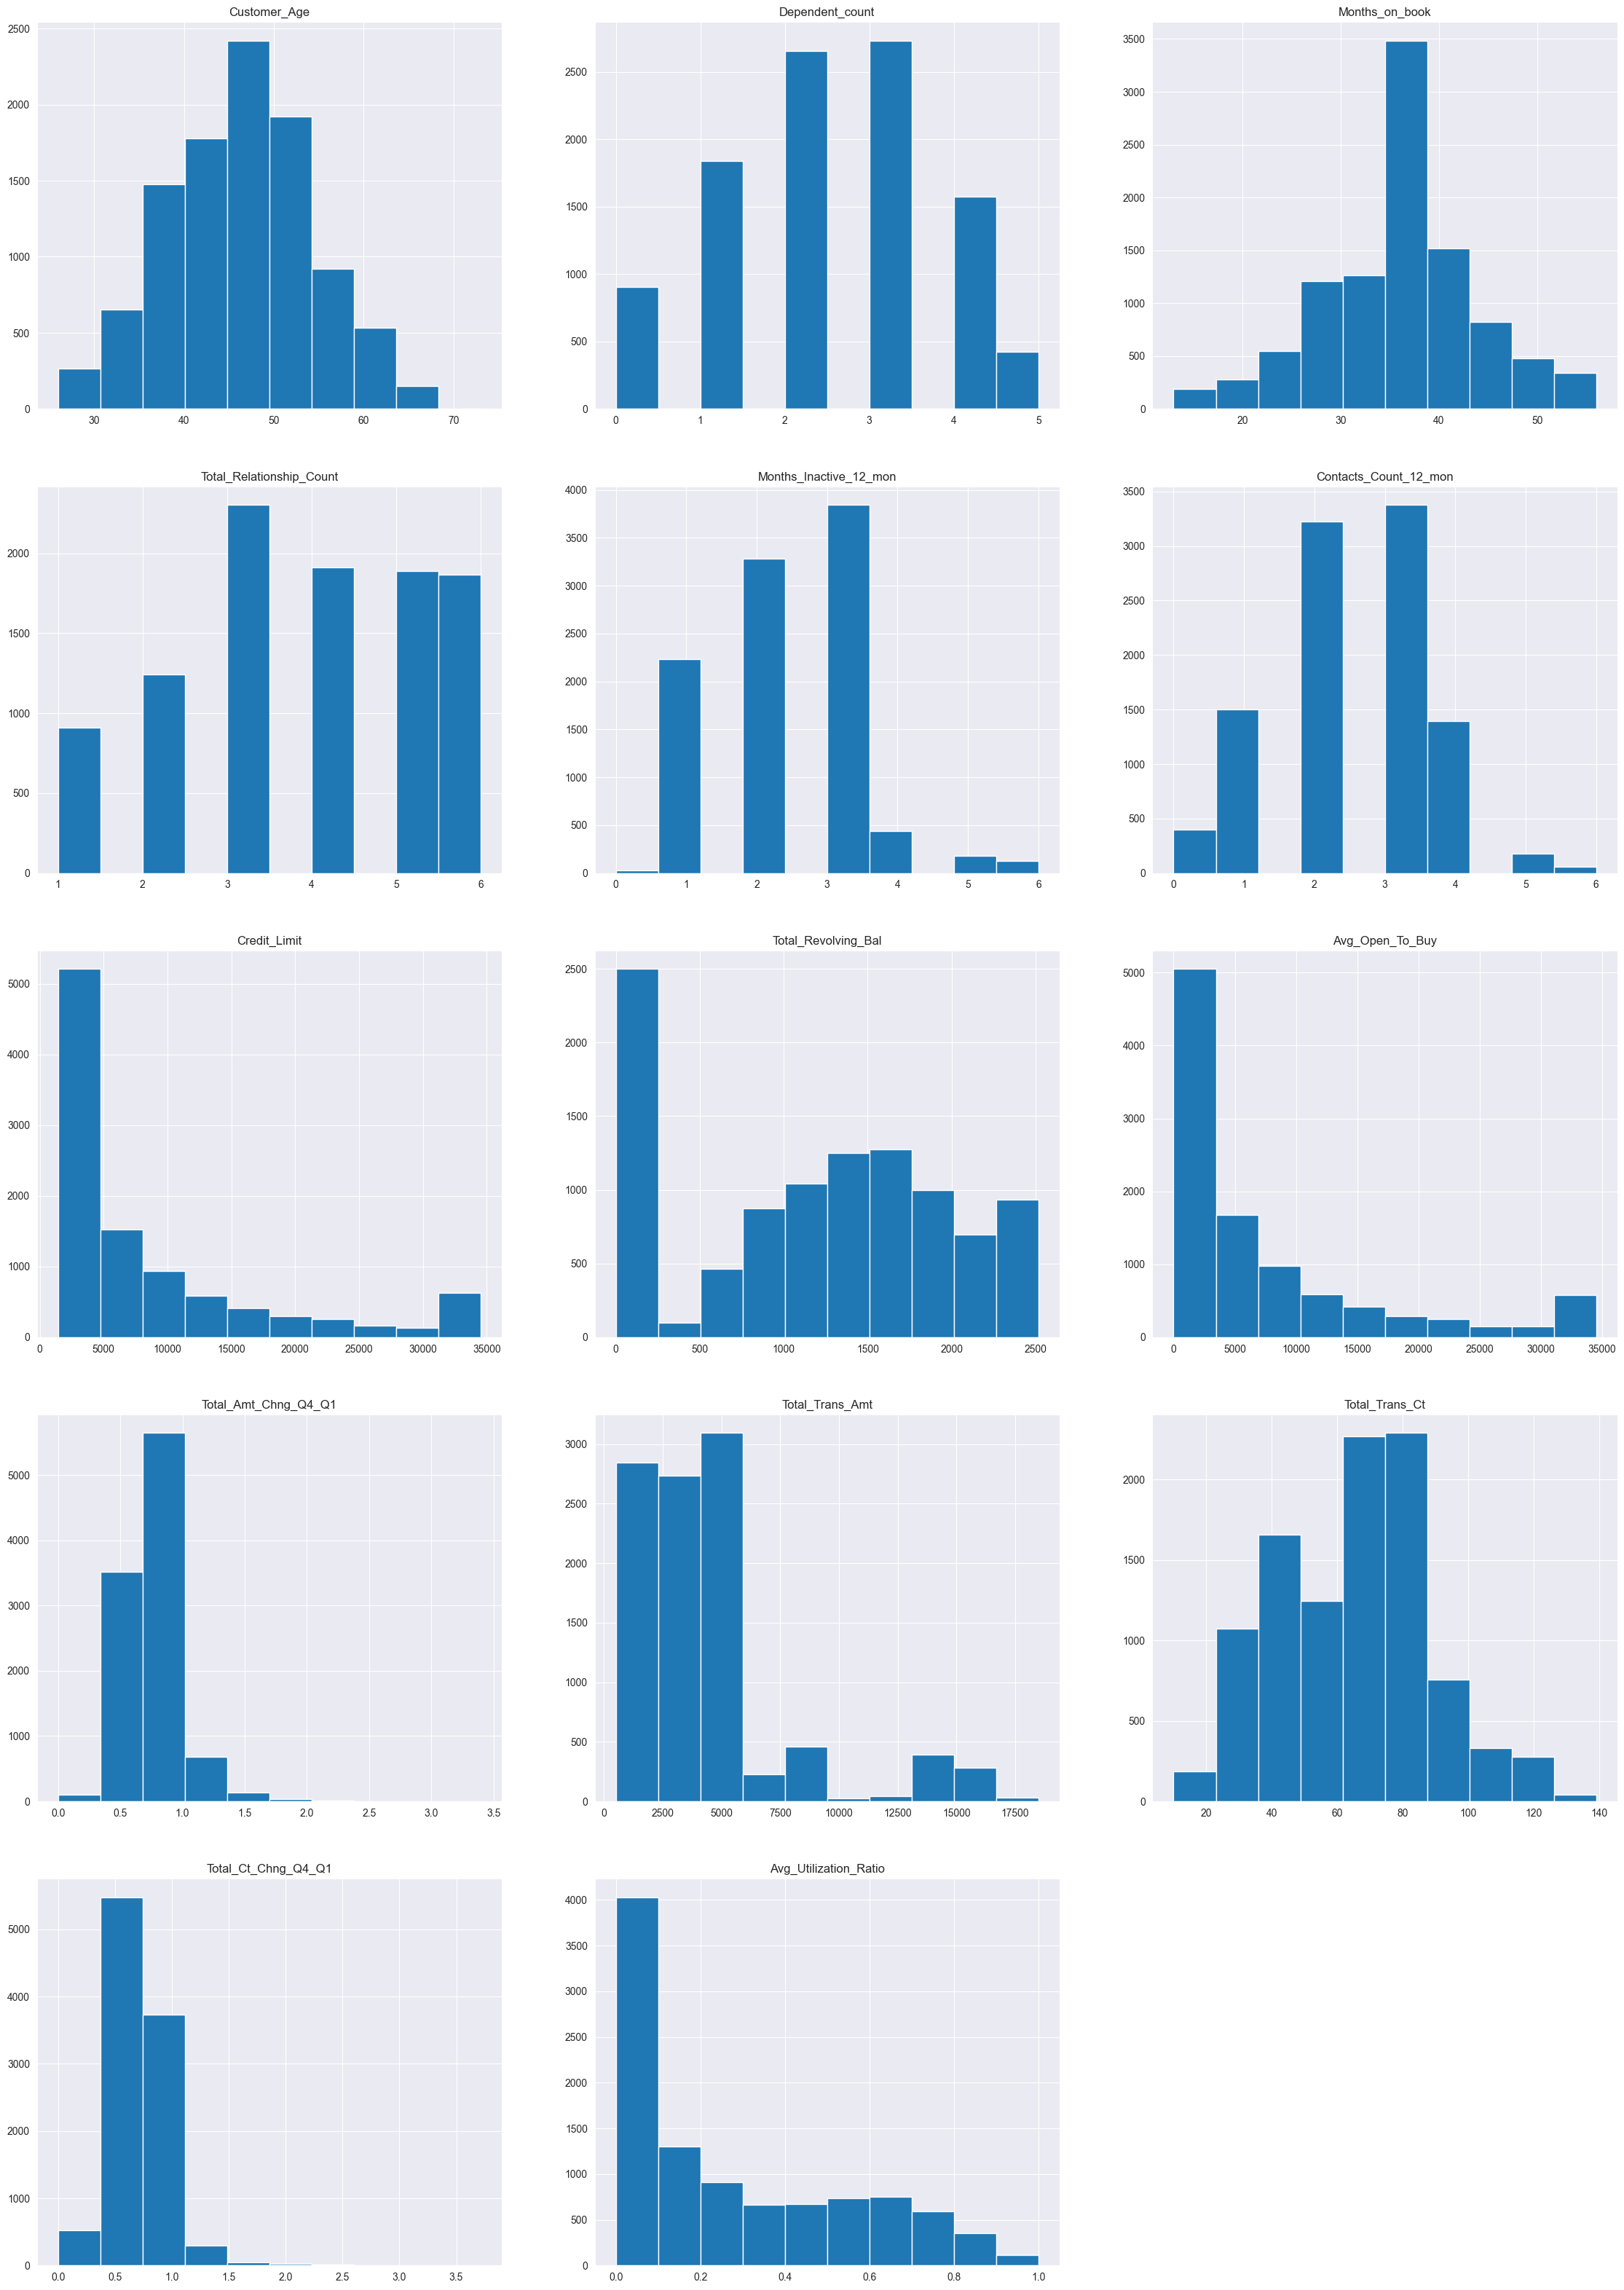

In [14]:
visualize_distribution_compact(df, numerical_columns)

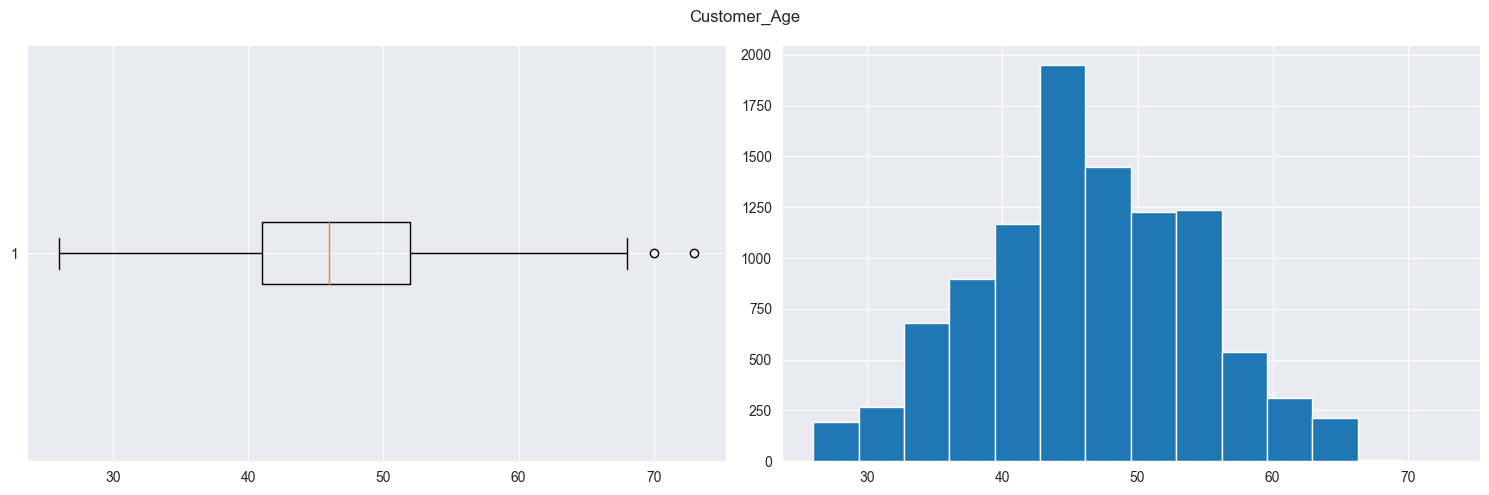

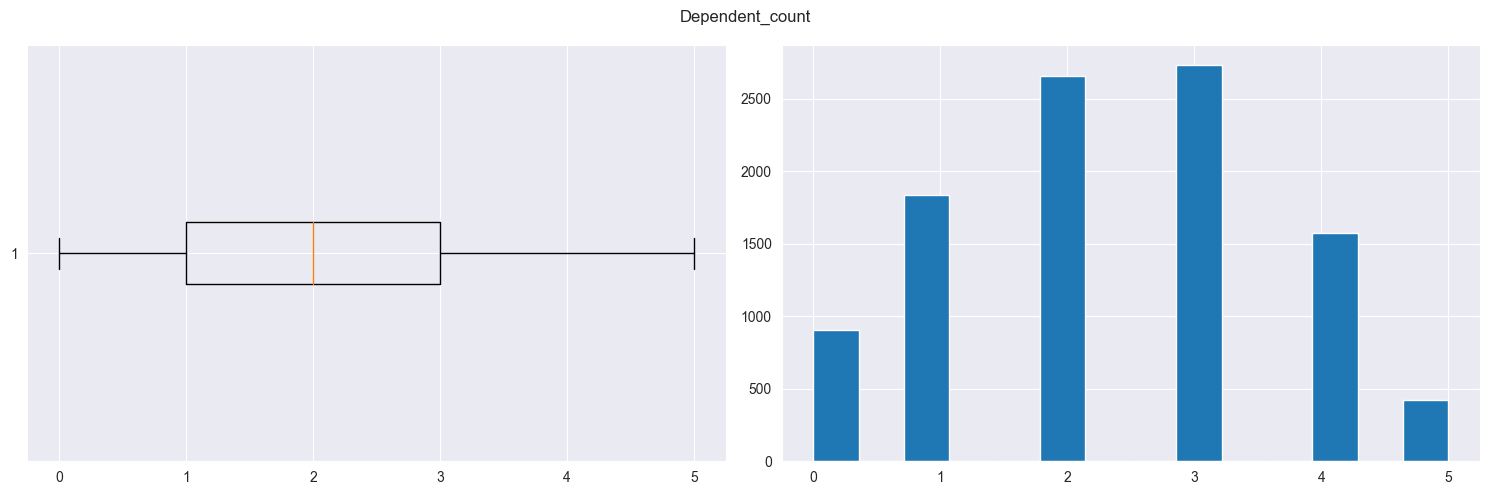

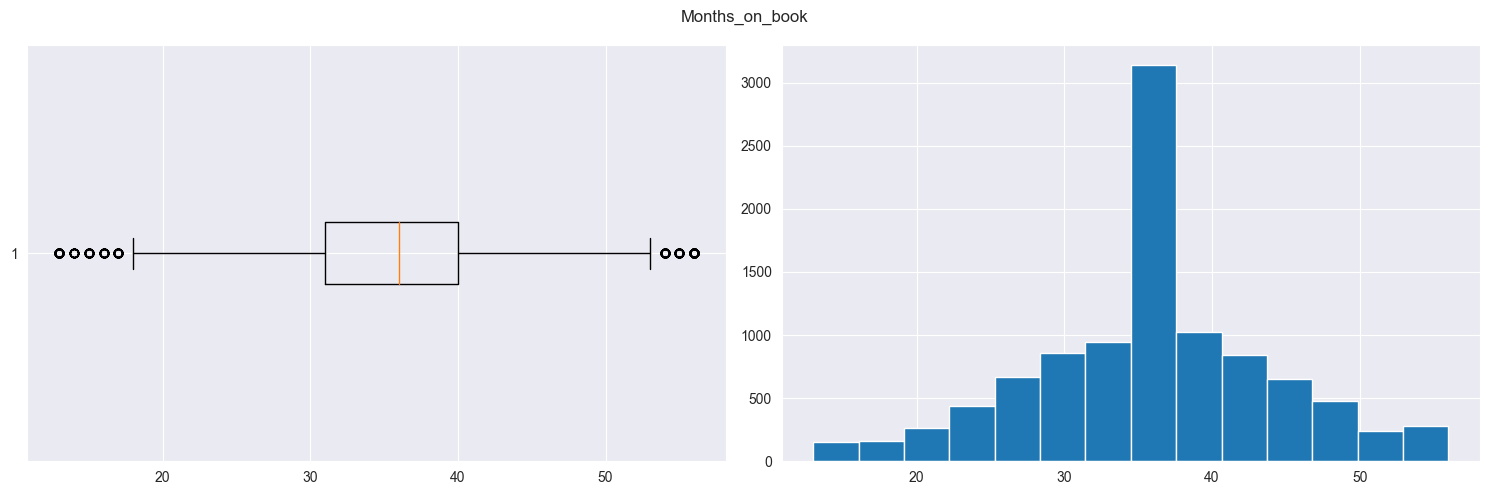

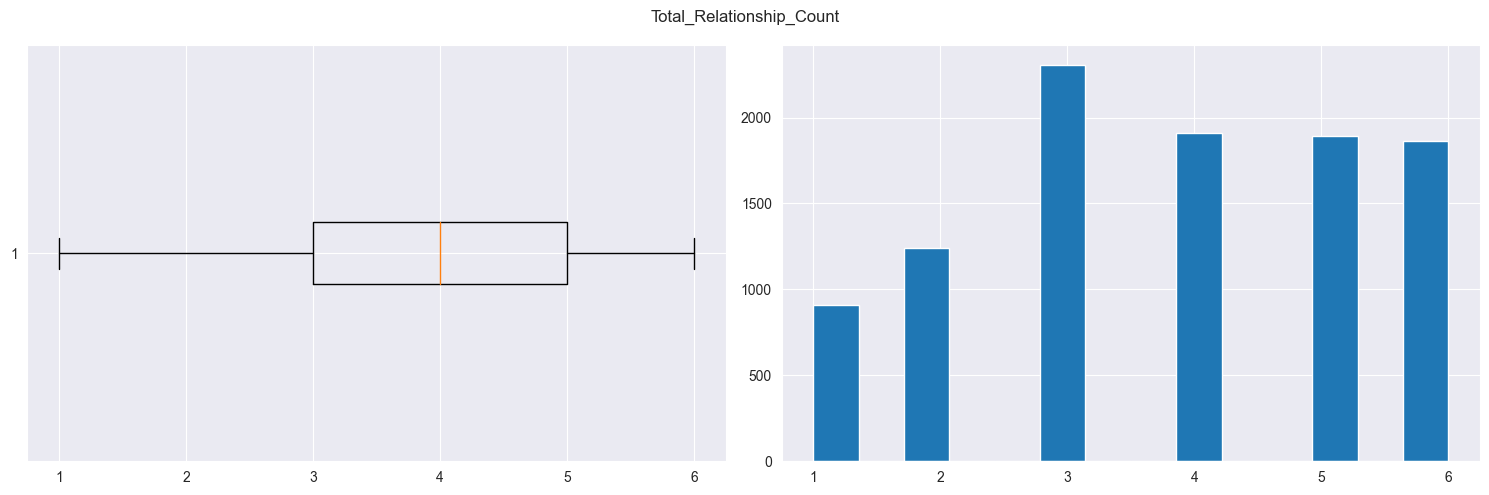

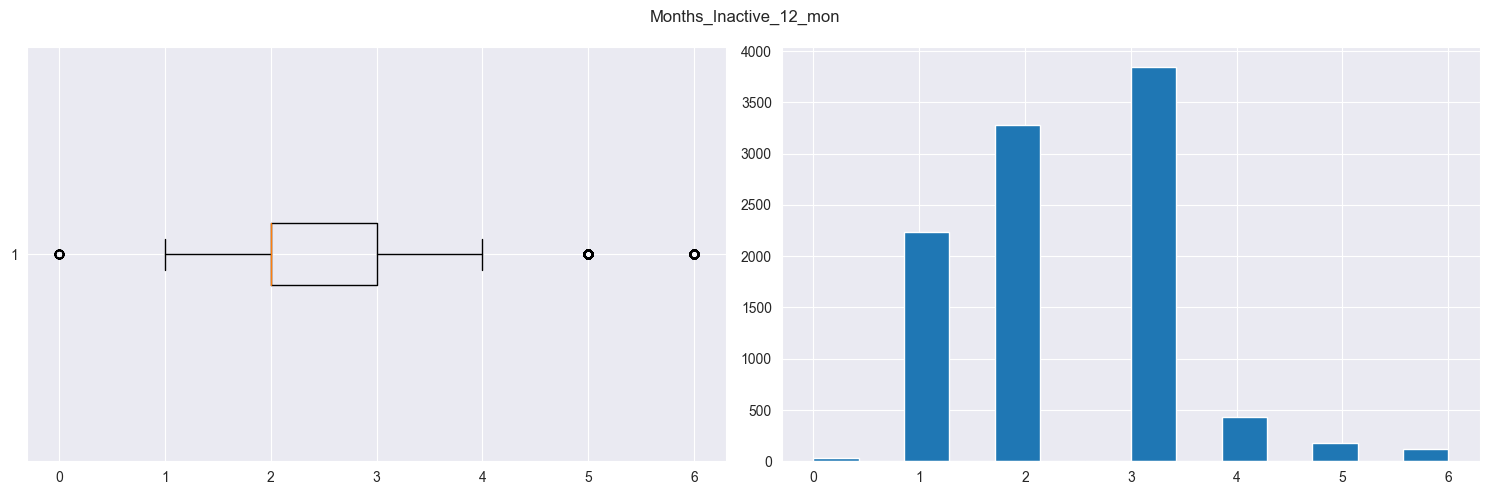

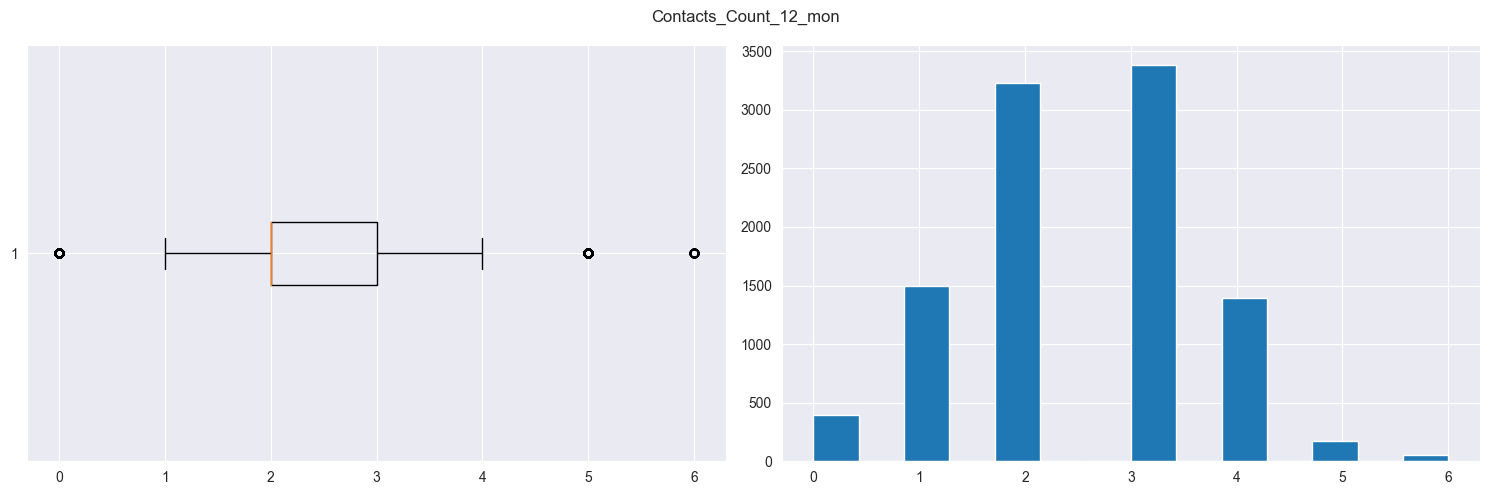

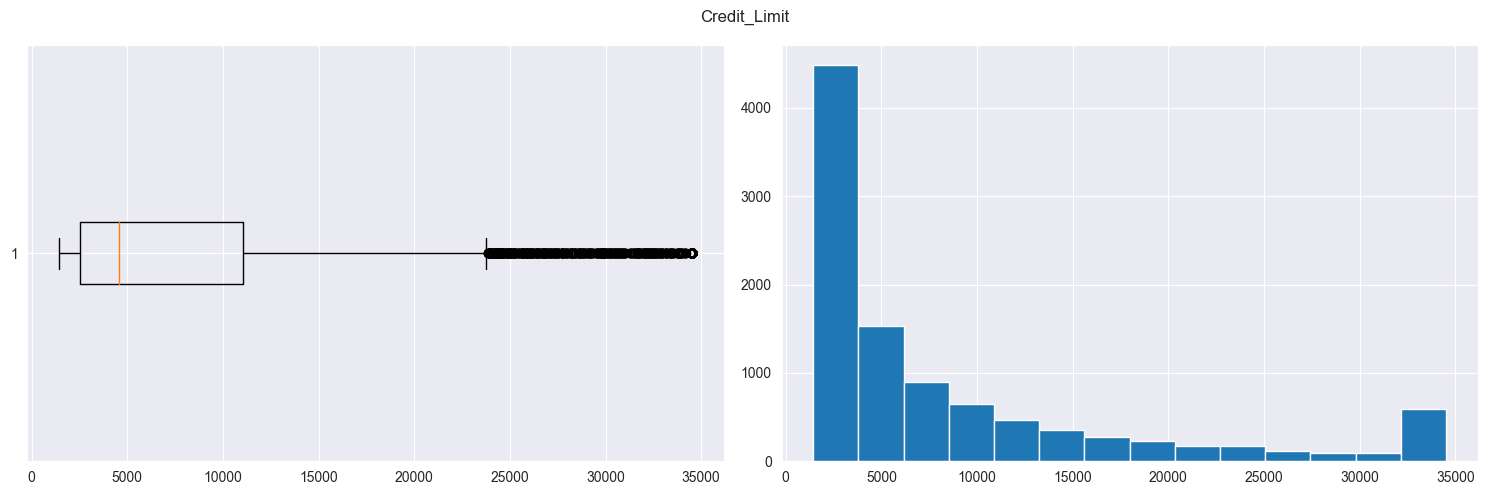

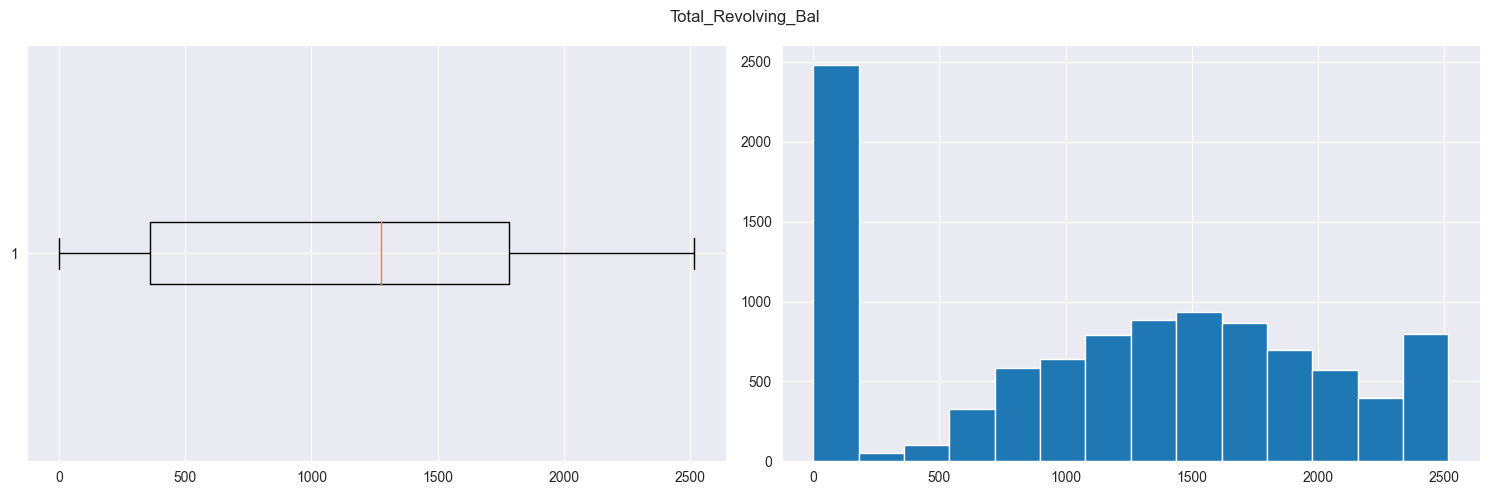

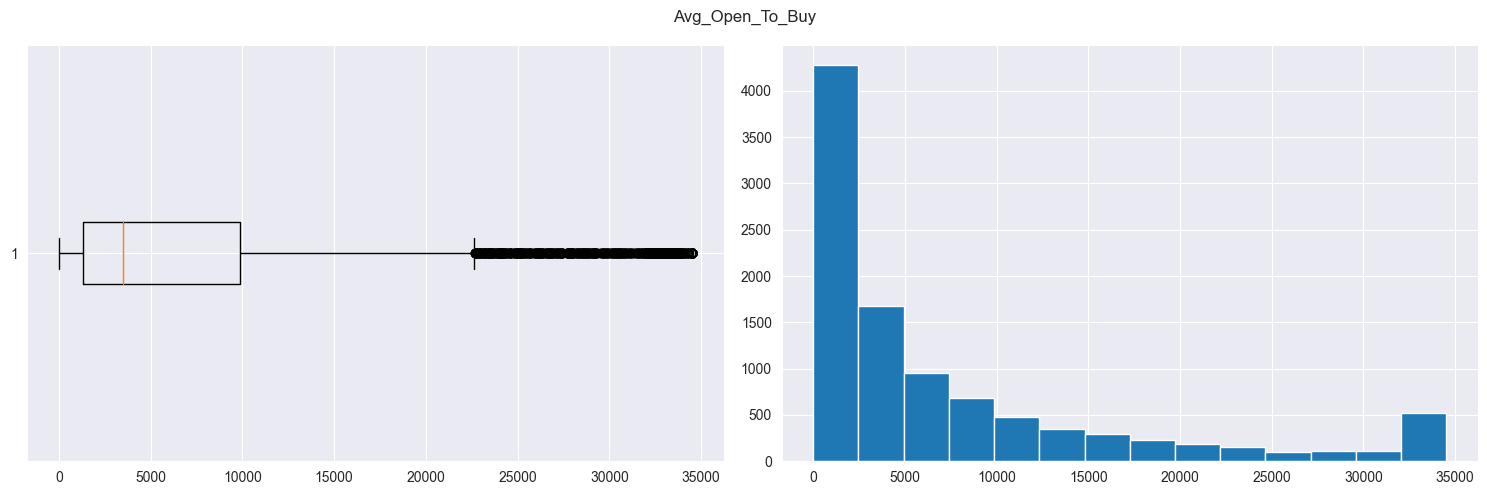

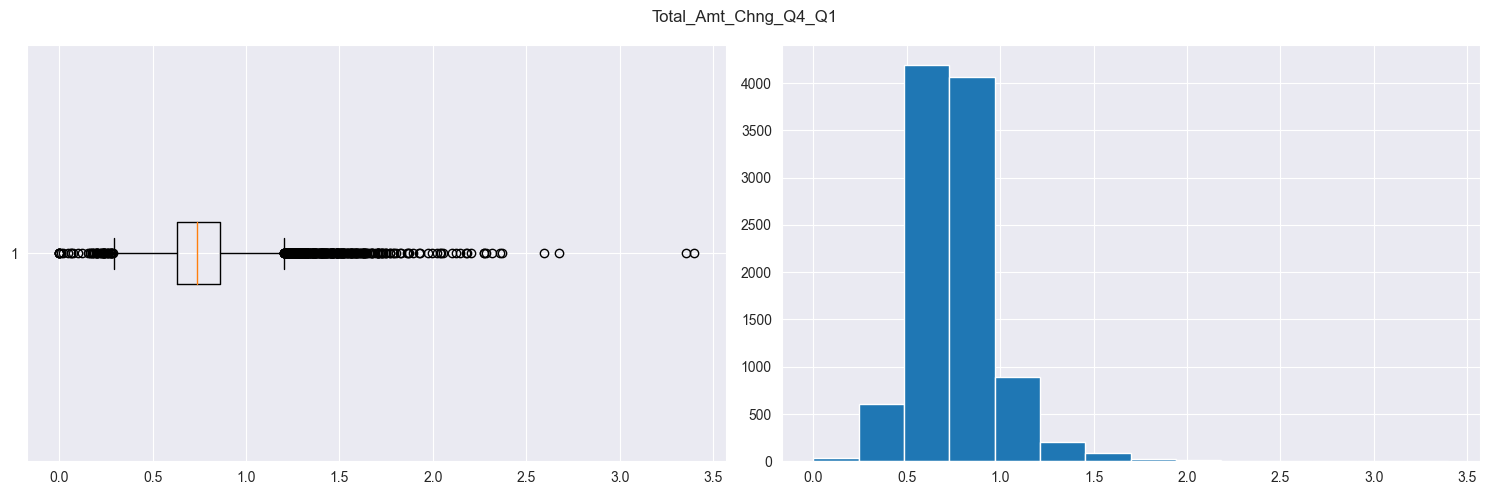

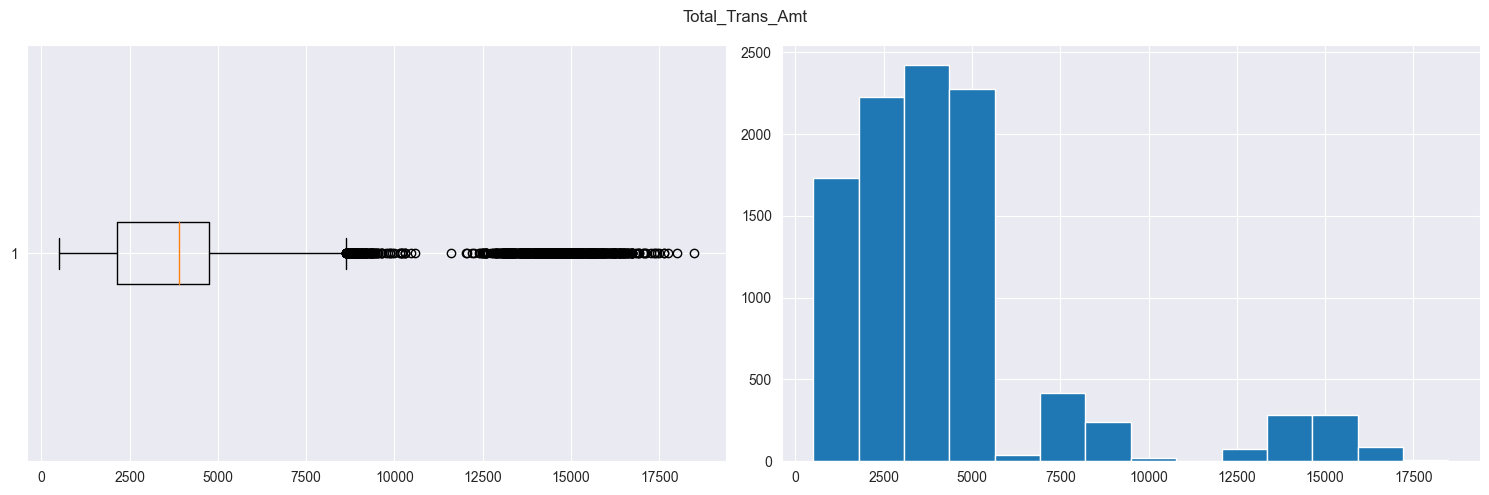

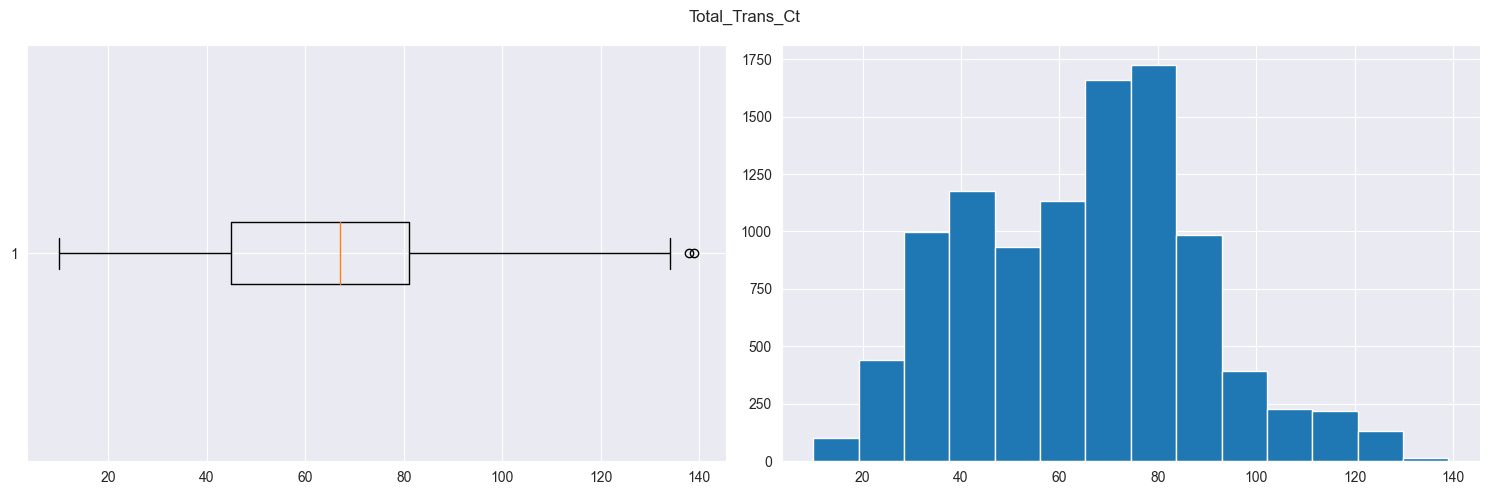

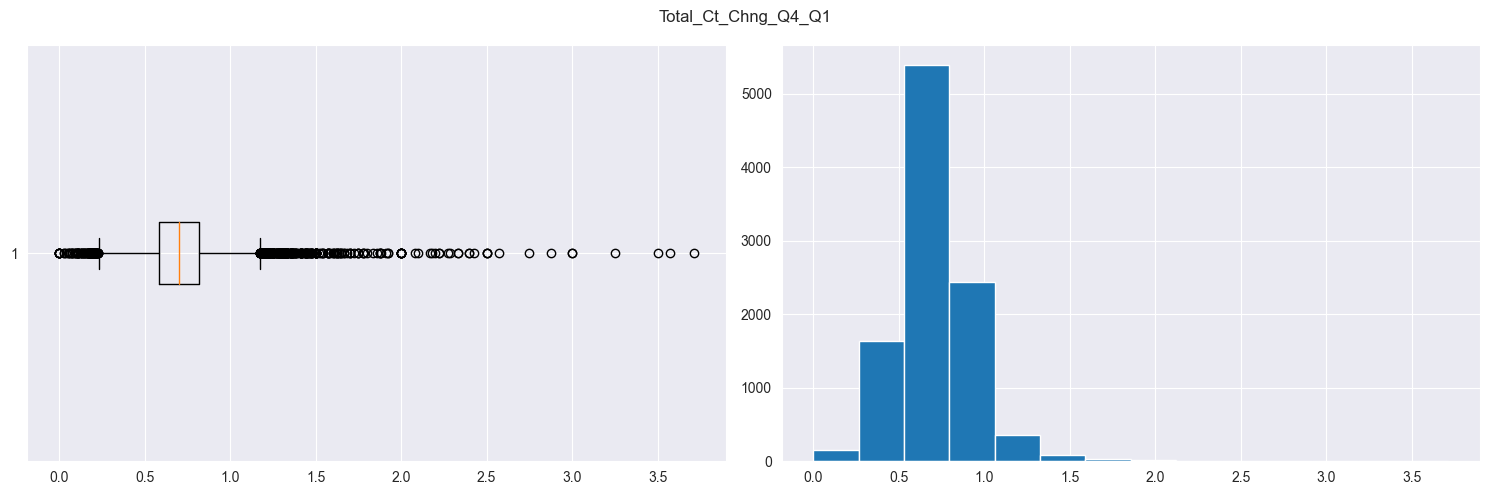

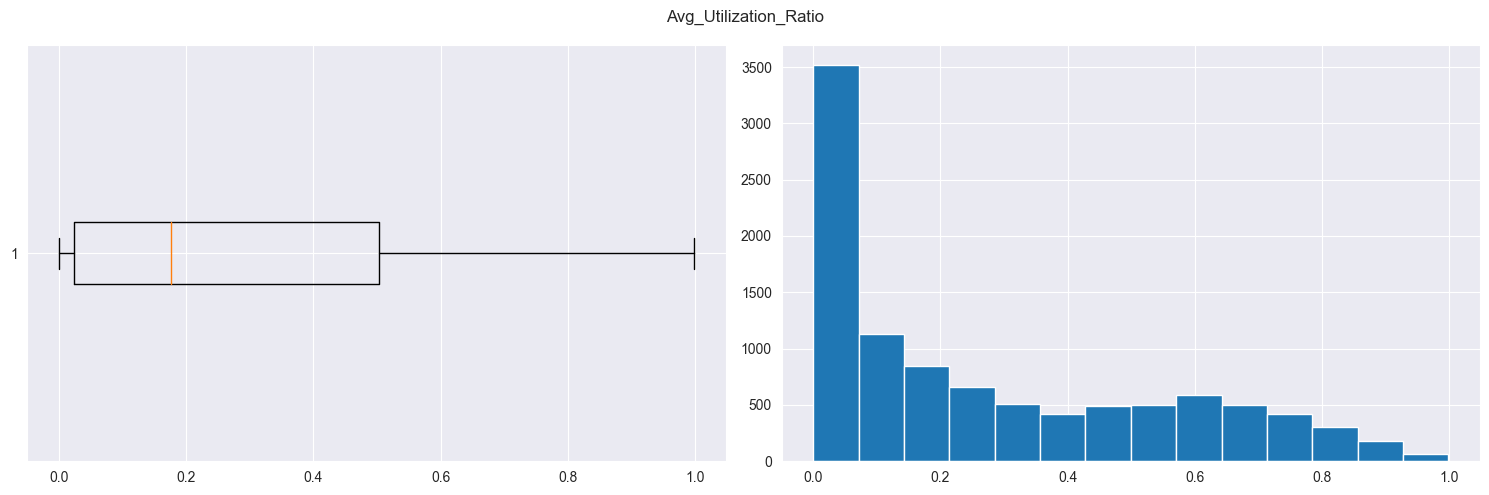

In [15]:
for column in numerical_columns:
    visualize_distribution(df, column)

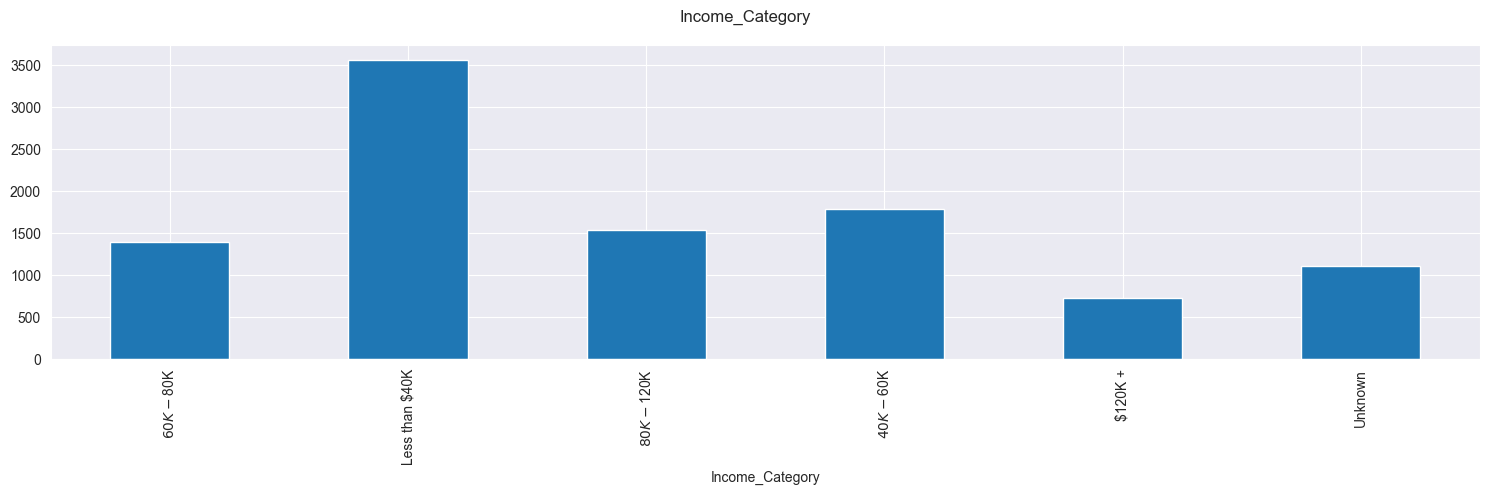

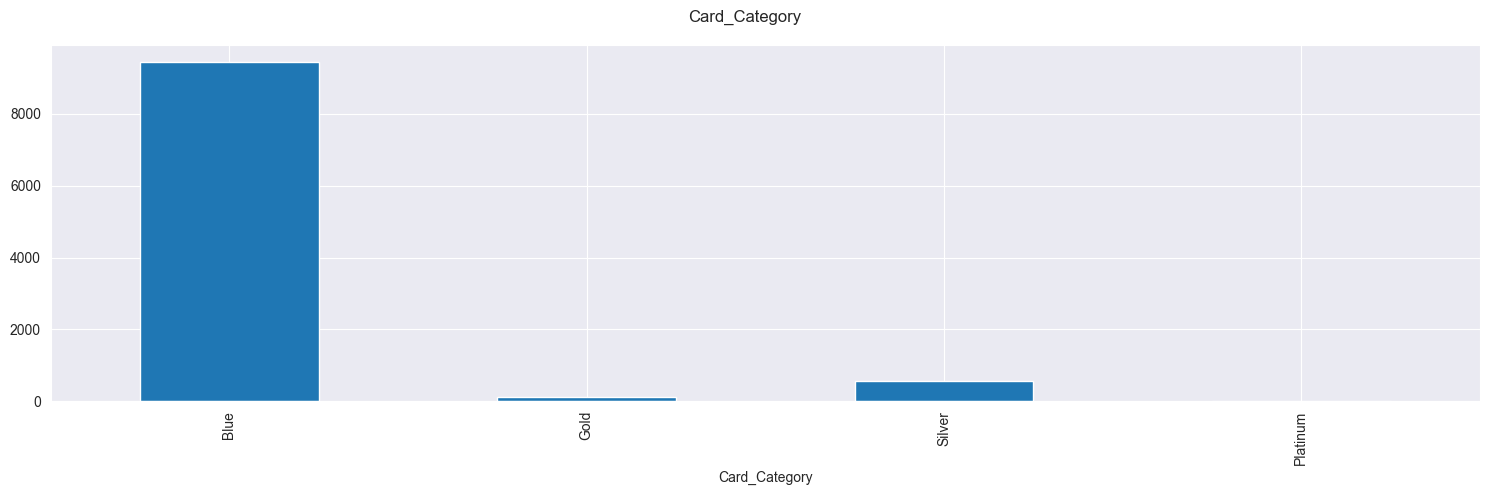

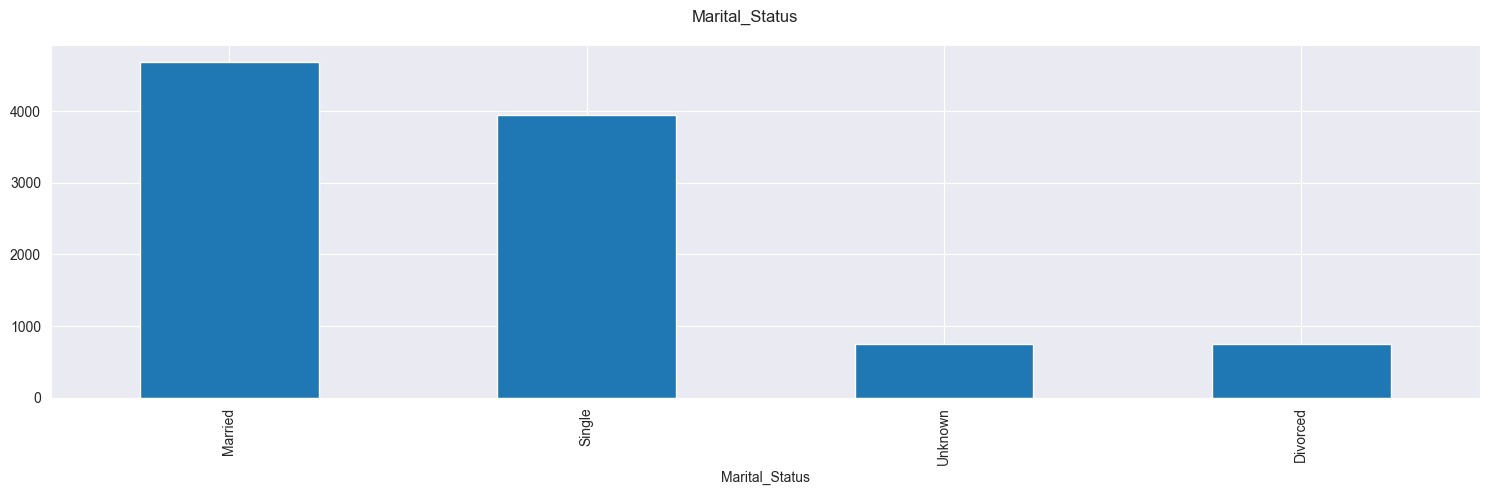

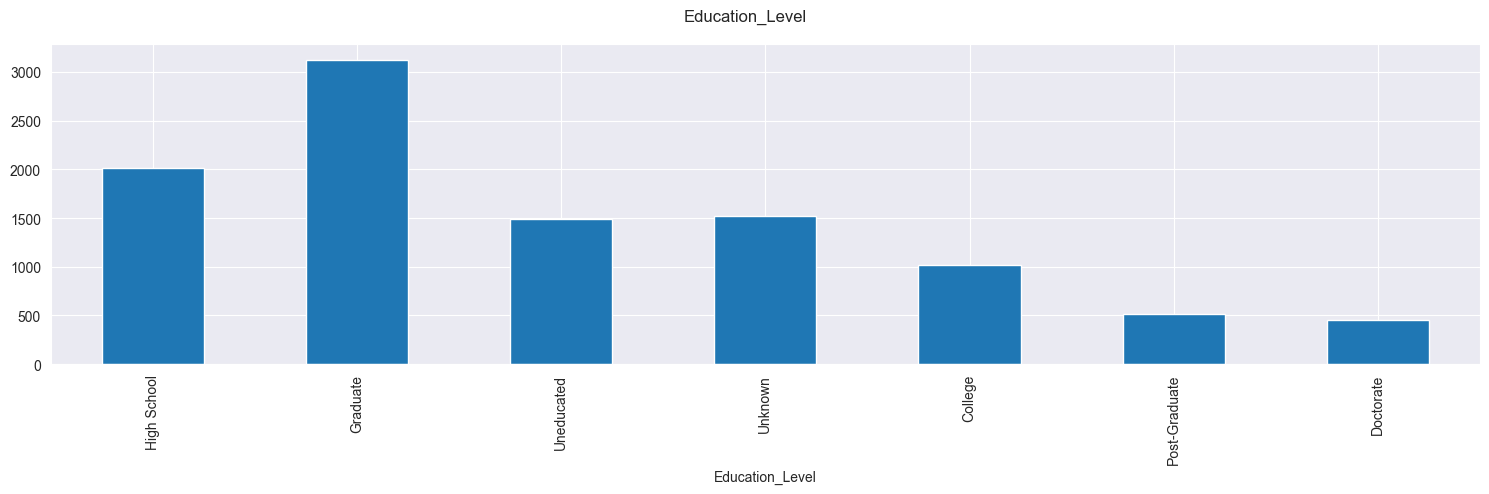

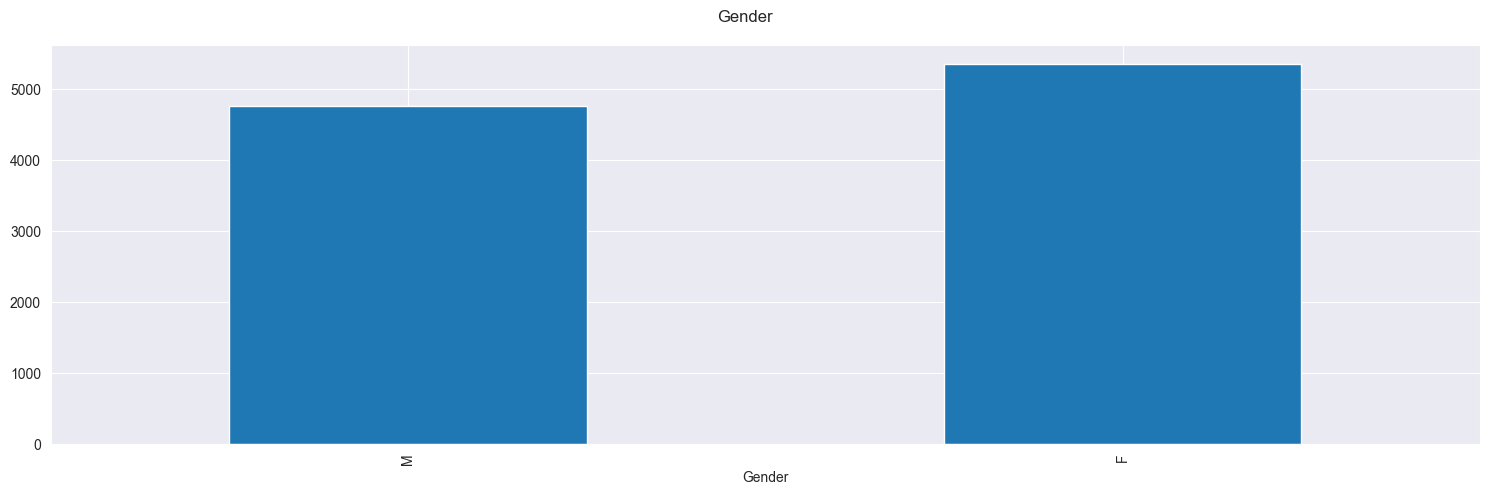

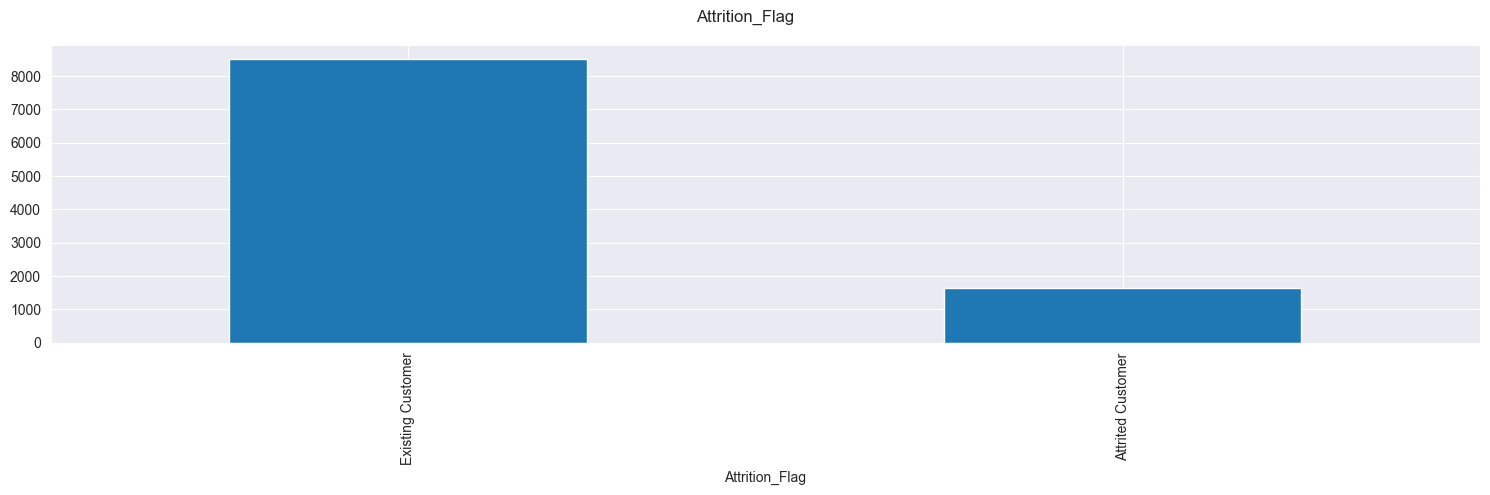

In [16]:
for column in categorical_columns:
    visualize_distribution_cat(df, column)

### Missing Values

In [17]:
df.isnull().sum()

id                          0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

No NA or NaN, however from the value count plots we could see there are some 'Unknown' values in the categorical features

In [18]:
df = df.replace('Unknown', np.nan)

## Bivariate data exploration

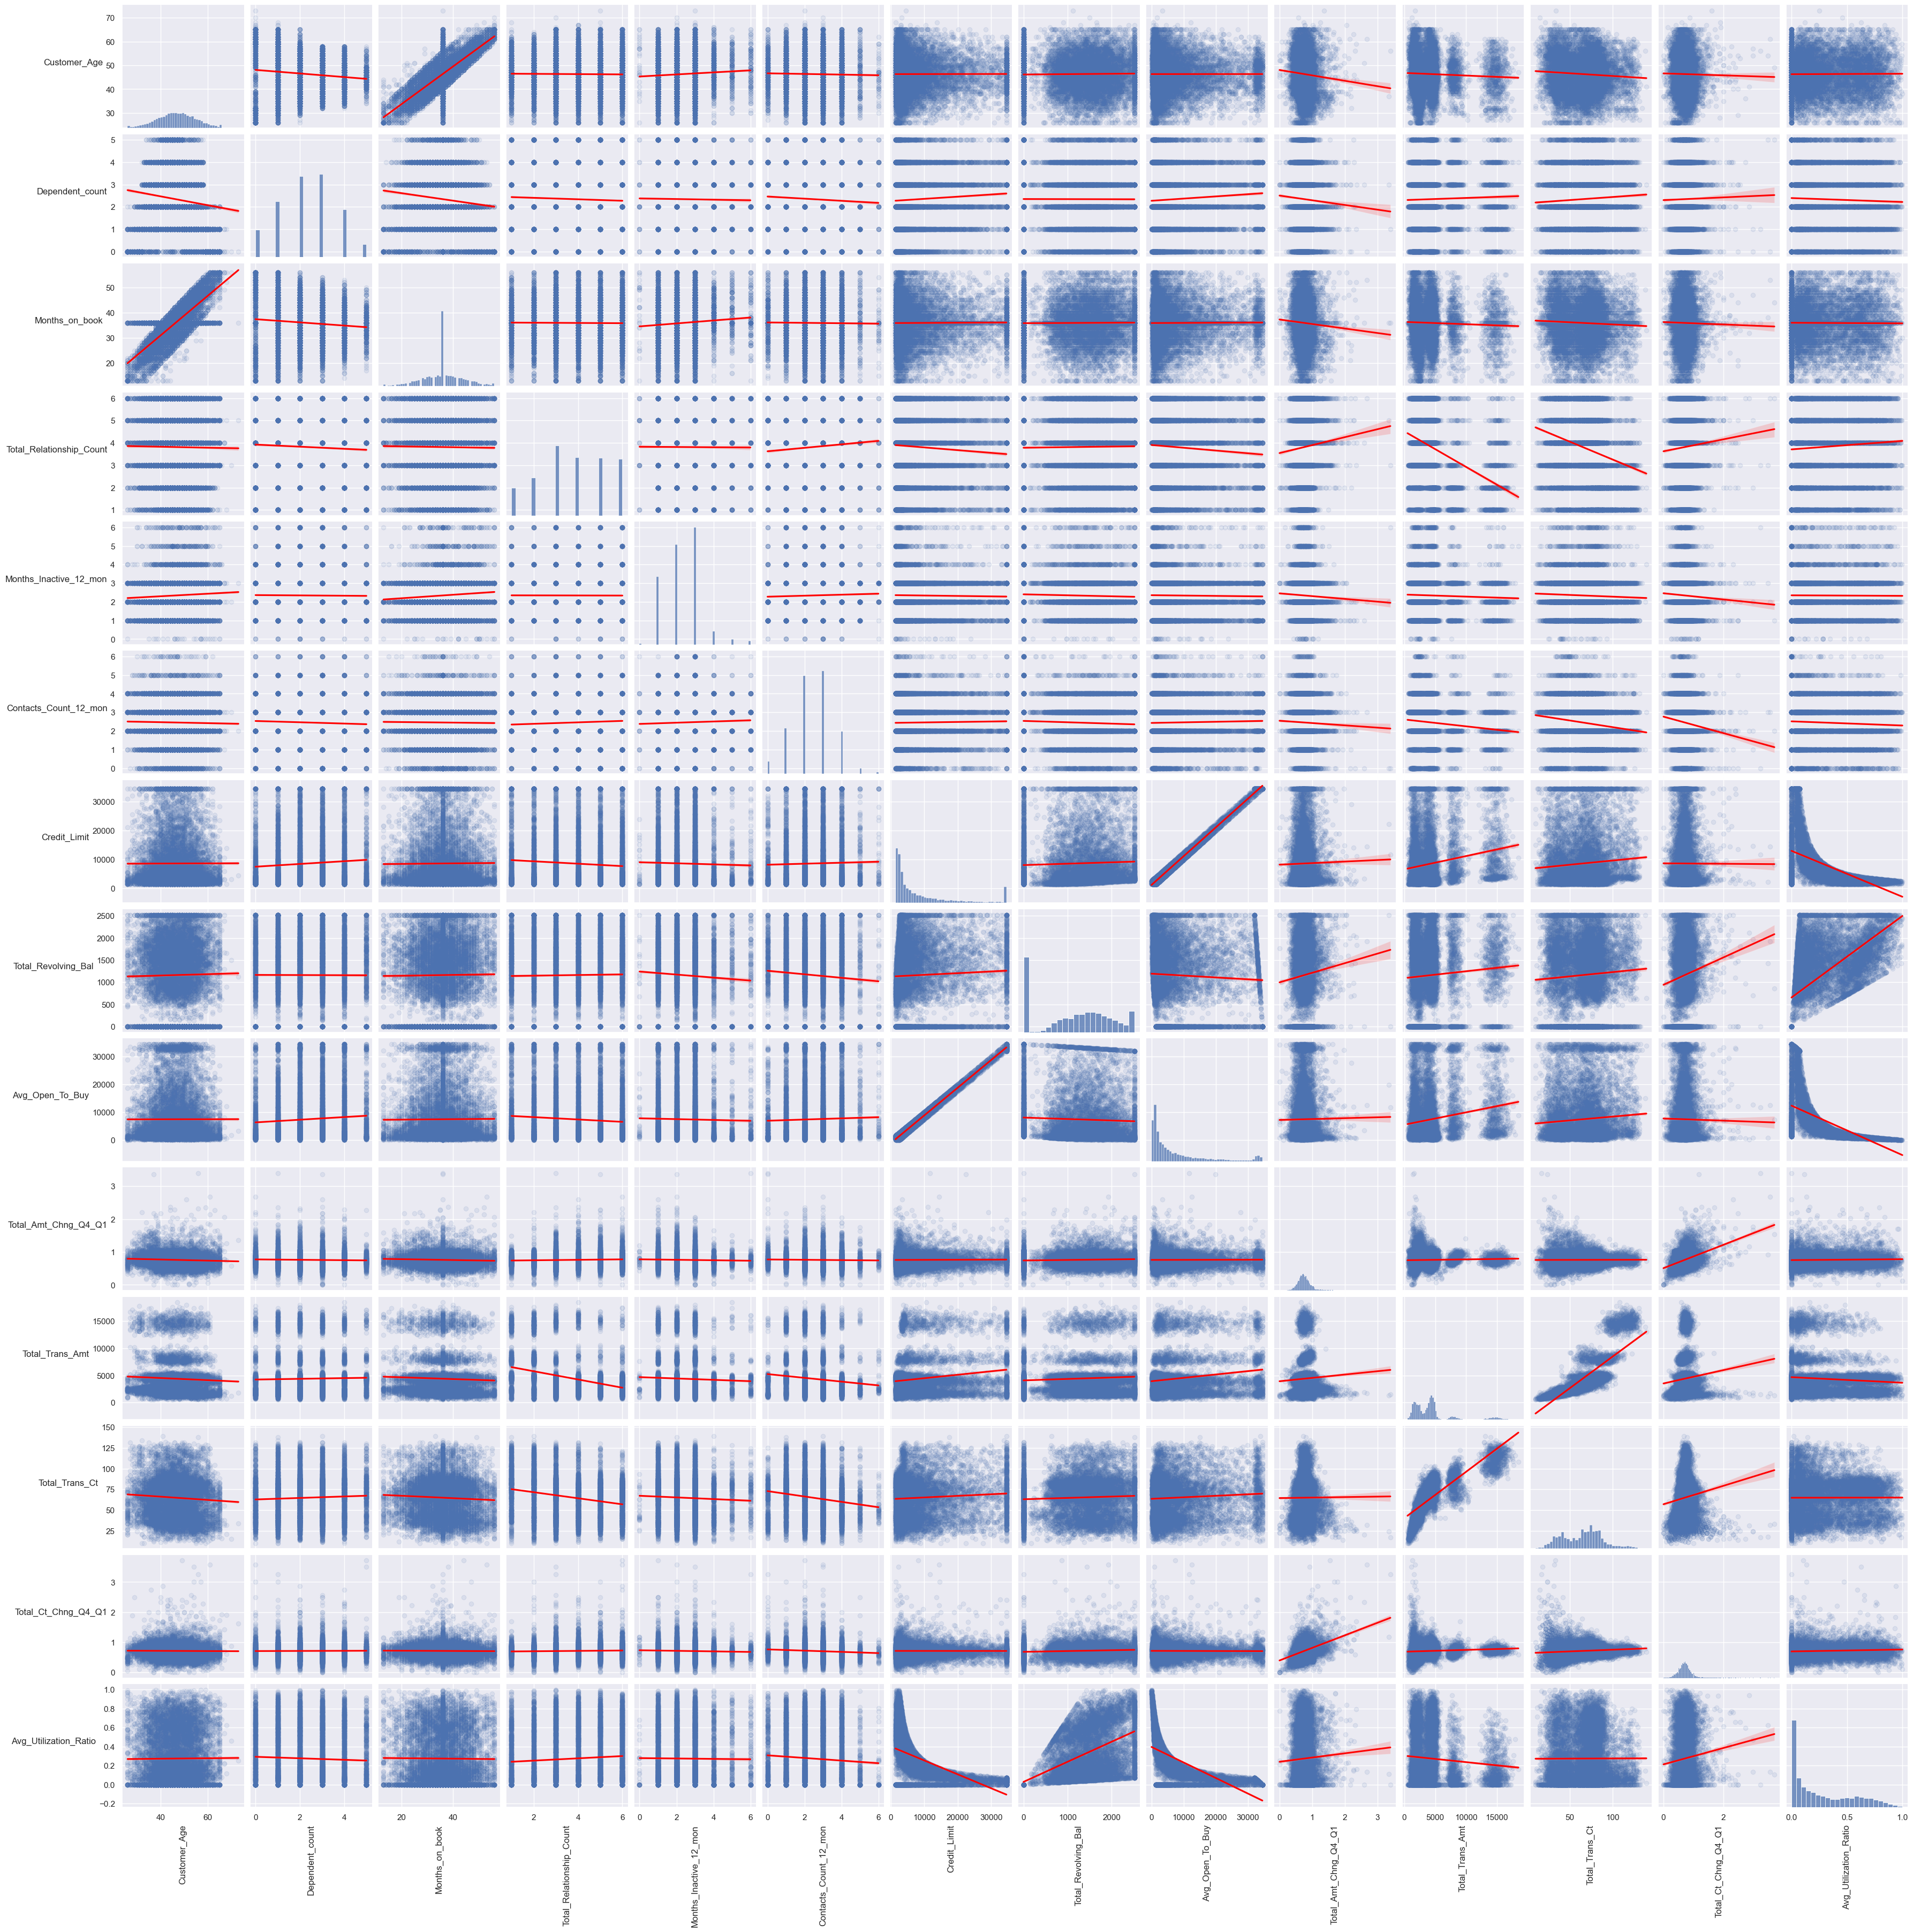

In [19]:
# may take a bit longer to execute ~2min
sns.set(font_scale = 1)
g=sns.pairplot(df[numerical_columns], kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}},diag_kind="hist")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

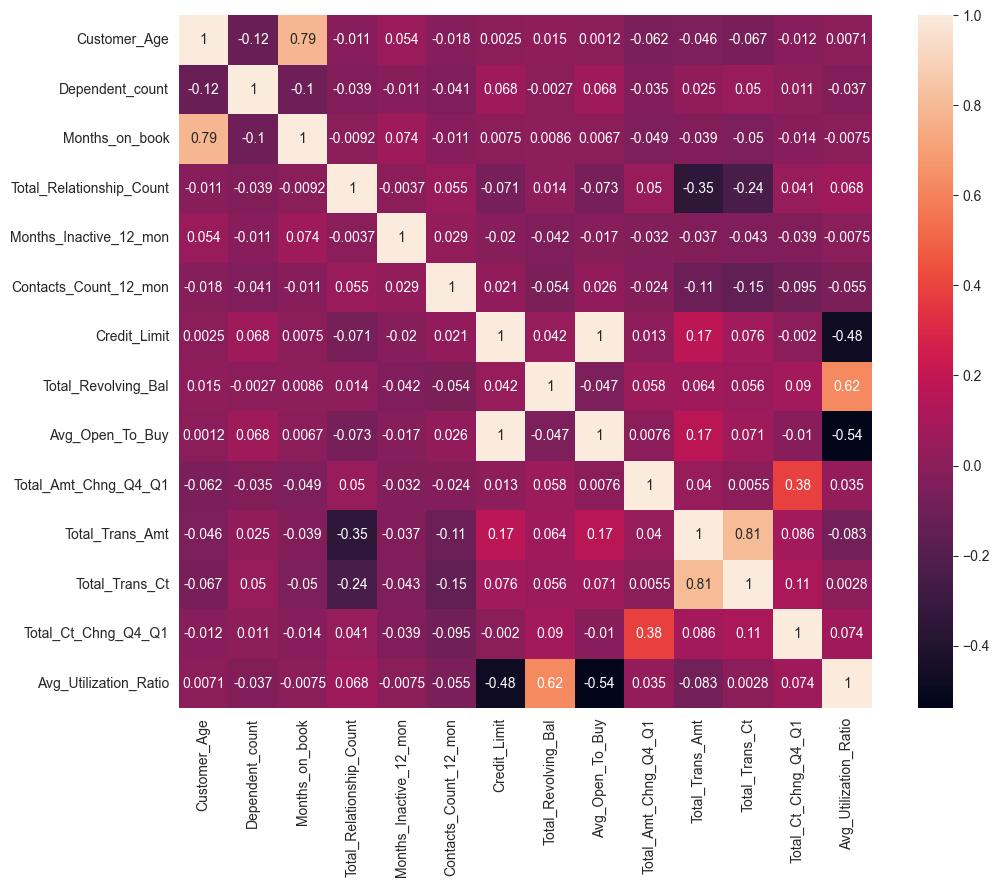

In [319]:
#correlation matrix
corrmat = df[numerical_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True);

In [21]:
corrmat

Customer_Age  Dependent_count  Months_on_book   
Customer_Age                  1.000000        -0.122254        0.788912  \
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   
Contacts_Count_12_mon        -0.018452        -0.040505       -0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780        -0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062042        -0.035439       -0.048959   
Total_Trans_Amt              -0.046446         0.025046       -0.038591   
Total_Trans_Ct               -0.067097         0.049912       -0.049819   
Total_Ct_Chng_Q4_Q1          -0.012143         0.011087       -0.014072   
Avg_Utilization_Ratio         0.007114        -0.037135       -0.007541   

                          Total_Relationship_Count  Months_Inactive_12_mon   
Customer_Age                             -0.010931                0.054361  \
Dependent_count                          -0.039076               -0.010768   
Months_on_book                           -0.009203                0.074164   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   
Contacts_Count_12_mon                     0.055203                0.029493   
Credit_Limit                             -0.071386               -0.020394   
Total_Revolving_Bal                       0.013726               -0.042210   
Avg_Open_To_Buy                          -0.072601               -0.016605   
Total_Amt_Chng_Q4_Q1                      0.050119               -0.032247   
Total_Trans_Amt                          -0.347229               -0.036982   
Total_Trans_Ct                           -0.241891               -0.042787   
Total_Ct_Chng_Q4_Q1                       0.040831               -0.038989   
Avg_Utilization_Ratio                     0.067663               -0.007503   

                          Contacts_Count_12_mon  Credit_Limit   
Customer_Age                          -0.018452      0.002476  \
Dependent_count                       -0.040505      0.068065   
Months_on_book                        -0.010774      0.007507   
Total_Relationship_Count               0.055203     -0.071386   
Months_Inactive_12_mon                 0.029493     -0.020394   
Contacts_Count_12_mon                  1.000000      0.020817   
Credit_Limit                           0.020817      1.000000   
Total_Revolving_Bal                   -0.053913      0.042493   
Avg_Open_To_Buy                        0.025646      0.995981   
Total_Amt_Chng_Q4_Q1                  -0.024445      0.012813   
Total_Trans_Amt                       -0.112774      0.171730   
Total_Trans_Ct                        -0.152213      0.075927   
Total_Ct_Chng_Q4_Q1                   -0.094997     -0.002020   
Avg_Utilization_Ratio                 -0.055471     -0.482965   

                          Total_Revolving_Bal  Avg_Open_To_Buy   
Customer_Age                         0.014780         0.001151  \
Dependent_count                     -0.002688         0.068291   
Months_on_book                       0.008623         0.006732   
Total_Relationship_Count             0.013726        -0.072601   
Months_Inactive_12_mon              -0.042210        -0.016605   
Contacts_Count_12_mon               -0.053913         0.025646   
Credit_Limit                         0.042493         0.995981   
Total_Revolving_Bal                  1.000000        -0.047167   
Avg_Open_To_Buy                     -0.047167         1.000000   
Total_Amt_Chng_Q4_Q1                 0.058174         0.007595   
Total_Trans_Amt            

Visualize distributions with respect to the target class

In [22]:
def visualize_distribution_tc(df, numerical_columns):
    fig, ax = plt.subplots(7, 2, tight_layout=True, figsize=(20, 60))
    for i, column in enumerate(numerical_columns):
        fig.suptitle(column)
        sns.boxplot(y=column, x='Attrition_Flag', hue='Attrition_Flag', data=df, ax=ax[math.floor(i/2)][i%2])
    fig.tight_layout()

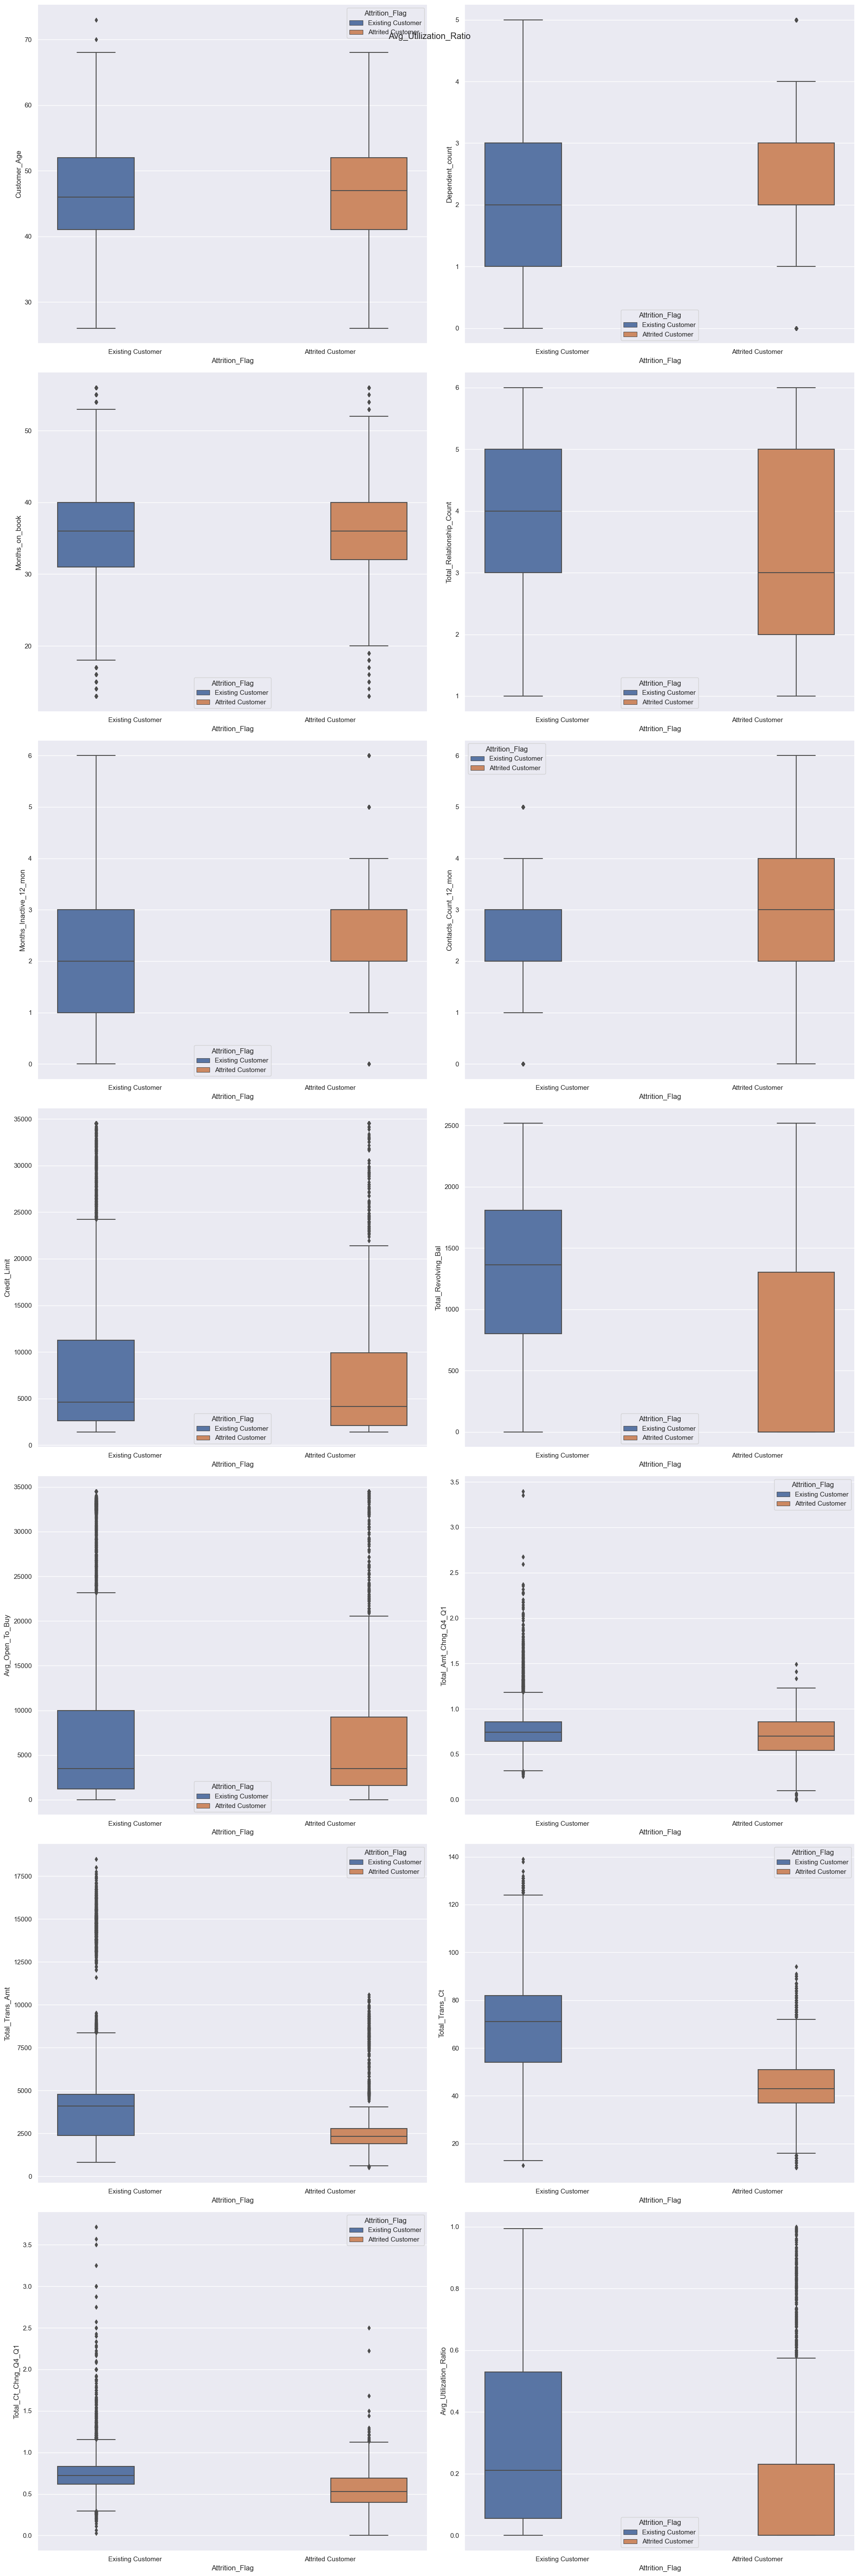

In [23]:
visualize_distribution_tc(df, numerical_columns)

In [24]:
def visualize_distribution_cat_tc(df, categorical_columns):
    fig, ax = plt.subplots(3, 2, tight_layout=True, figsize=(20, 30))
    for i, column in enumerate(categorical_columns, start=-1):
        if column == 'Attrition_Flag':
            continue
        fig.suptitle(column)
        sns.countplot(x=column, hue='Attrition_Flag', data=df, ax=ax[math.floor(i/2)][i%2])
    fig.tight_layout()

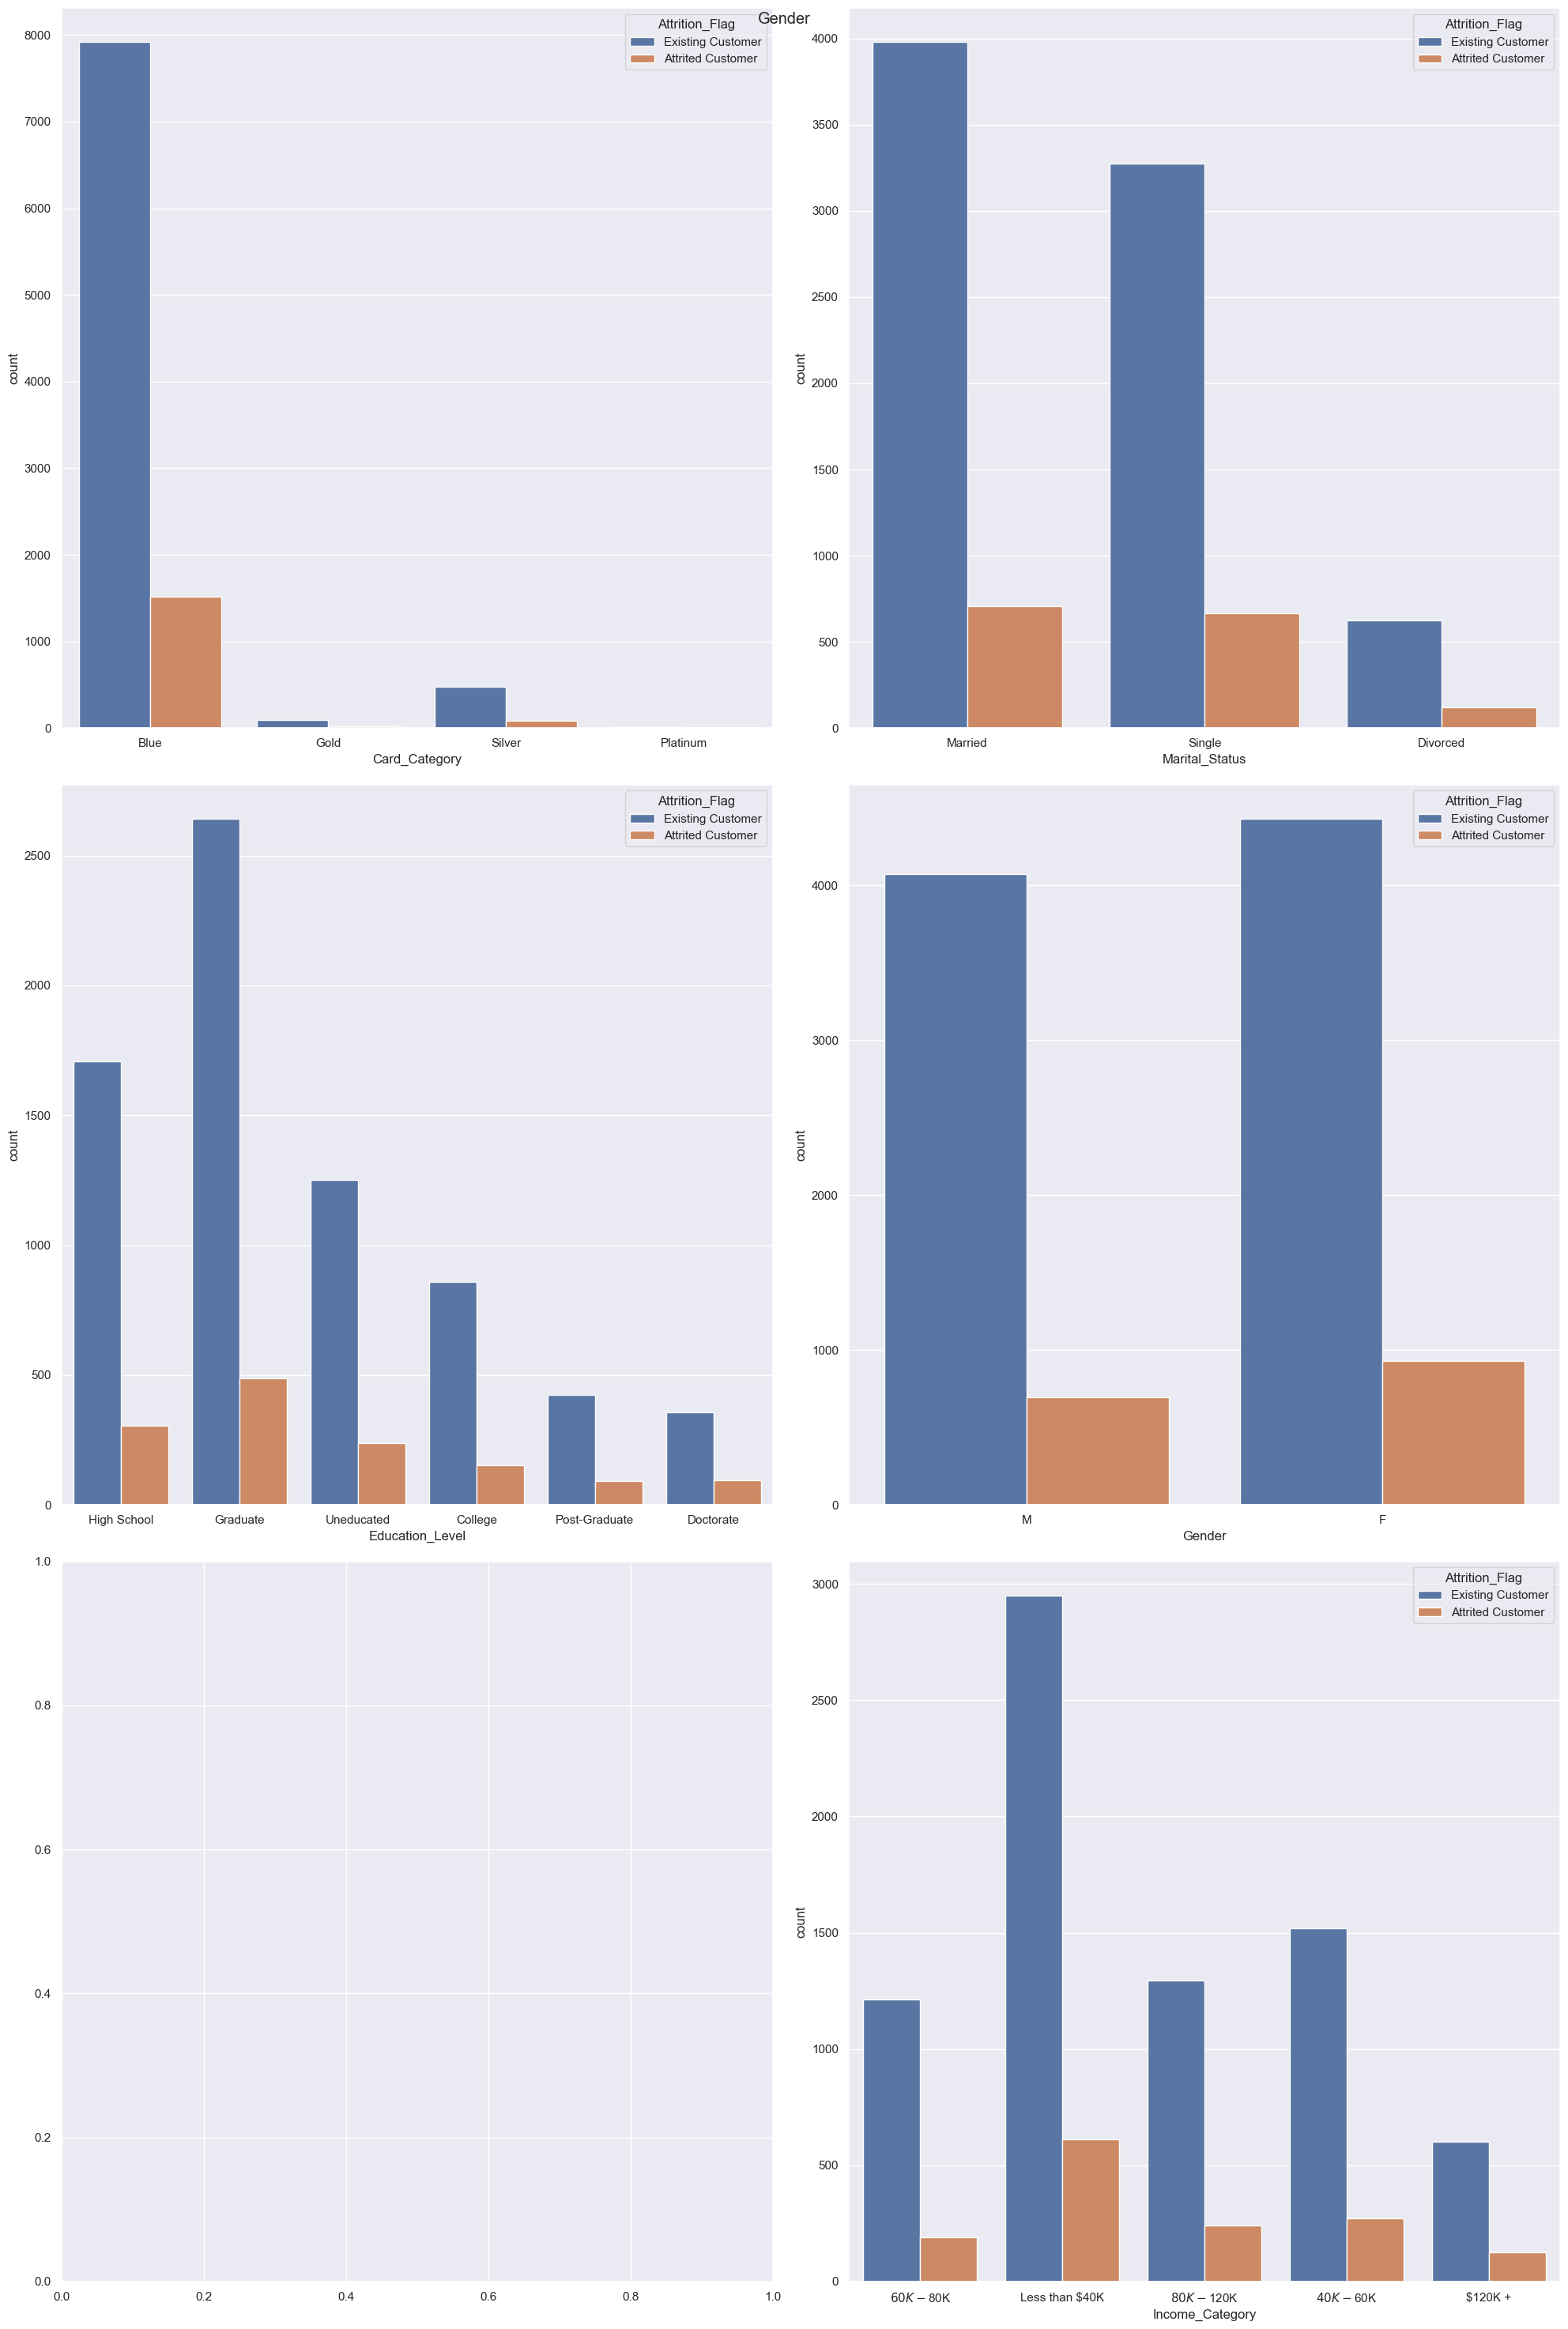

In [25]:
visualize_distribution_cat_tc(df, categorical_columns)

In [26]:
def cat_tc_percentage(df, categorical_columns):
    fig, ax = plt.subplots(3, 2, tight_layout=True, figsize=(20, 30))
    for index, column in enumerate(categorical_columns, start=-1):
        if column == 'Attrition_Flag':
            continue
        attrited = df[df["Attrition_Flag"] == 'Attrited Customer'][[column]].value_counts()
        original = df[column].value_counts()
        percentage = original.copy() # construct series object with the same index
        for i in range(0, len(attrited)):  #  get percentage of attrited
            percentage[i] = attrited[i]/original[i] * 100
        plot = percentage.plot.bar(ax=ax[math.floor(index/2)][index % 2])

        i = 0
        for x,y in percentage.items():
            original_norm = df[column].value_counts(normalize=True)
            ax[math.floor(index/2)][index % 2].annotate(str(round(original_norm[i] * 100, 2)) + '%', (i, y - 2), va='center', ha='center', fontsize=18, color='black', fontweight=500)
            i += 1

        # plot line representing percentage of attrited customers
        plot.axhline(y= df["Attrition_Flag"].value_counts(normalize=True)['Attrited Customer'] * 100, color = 'red')


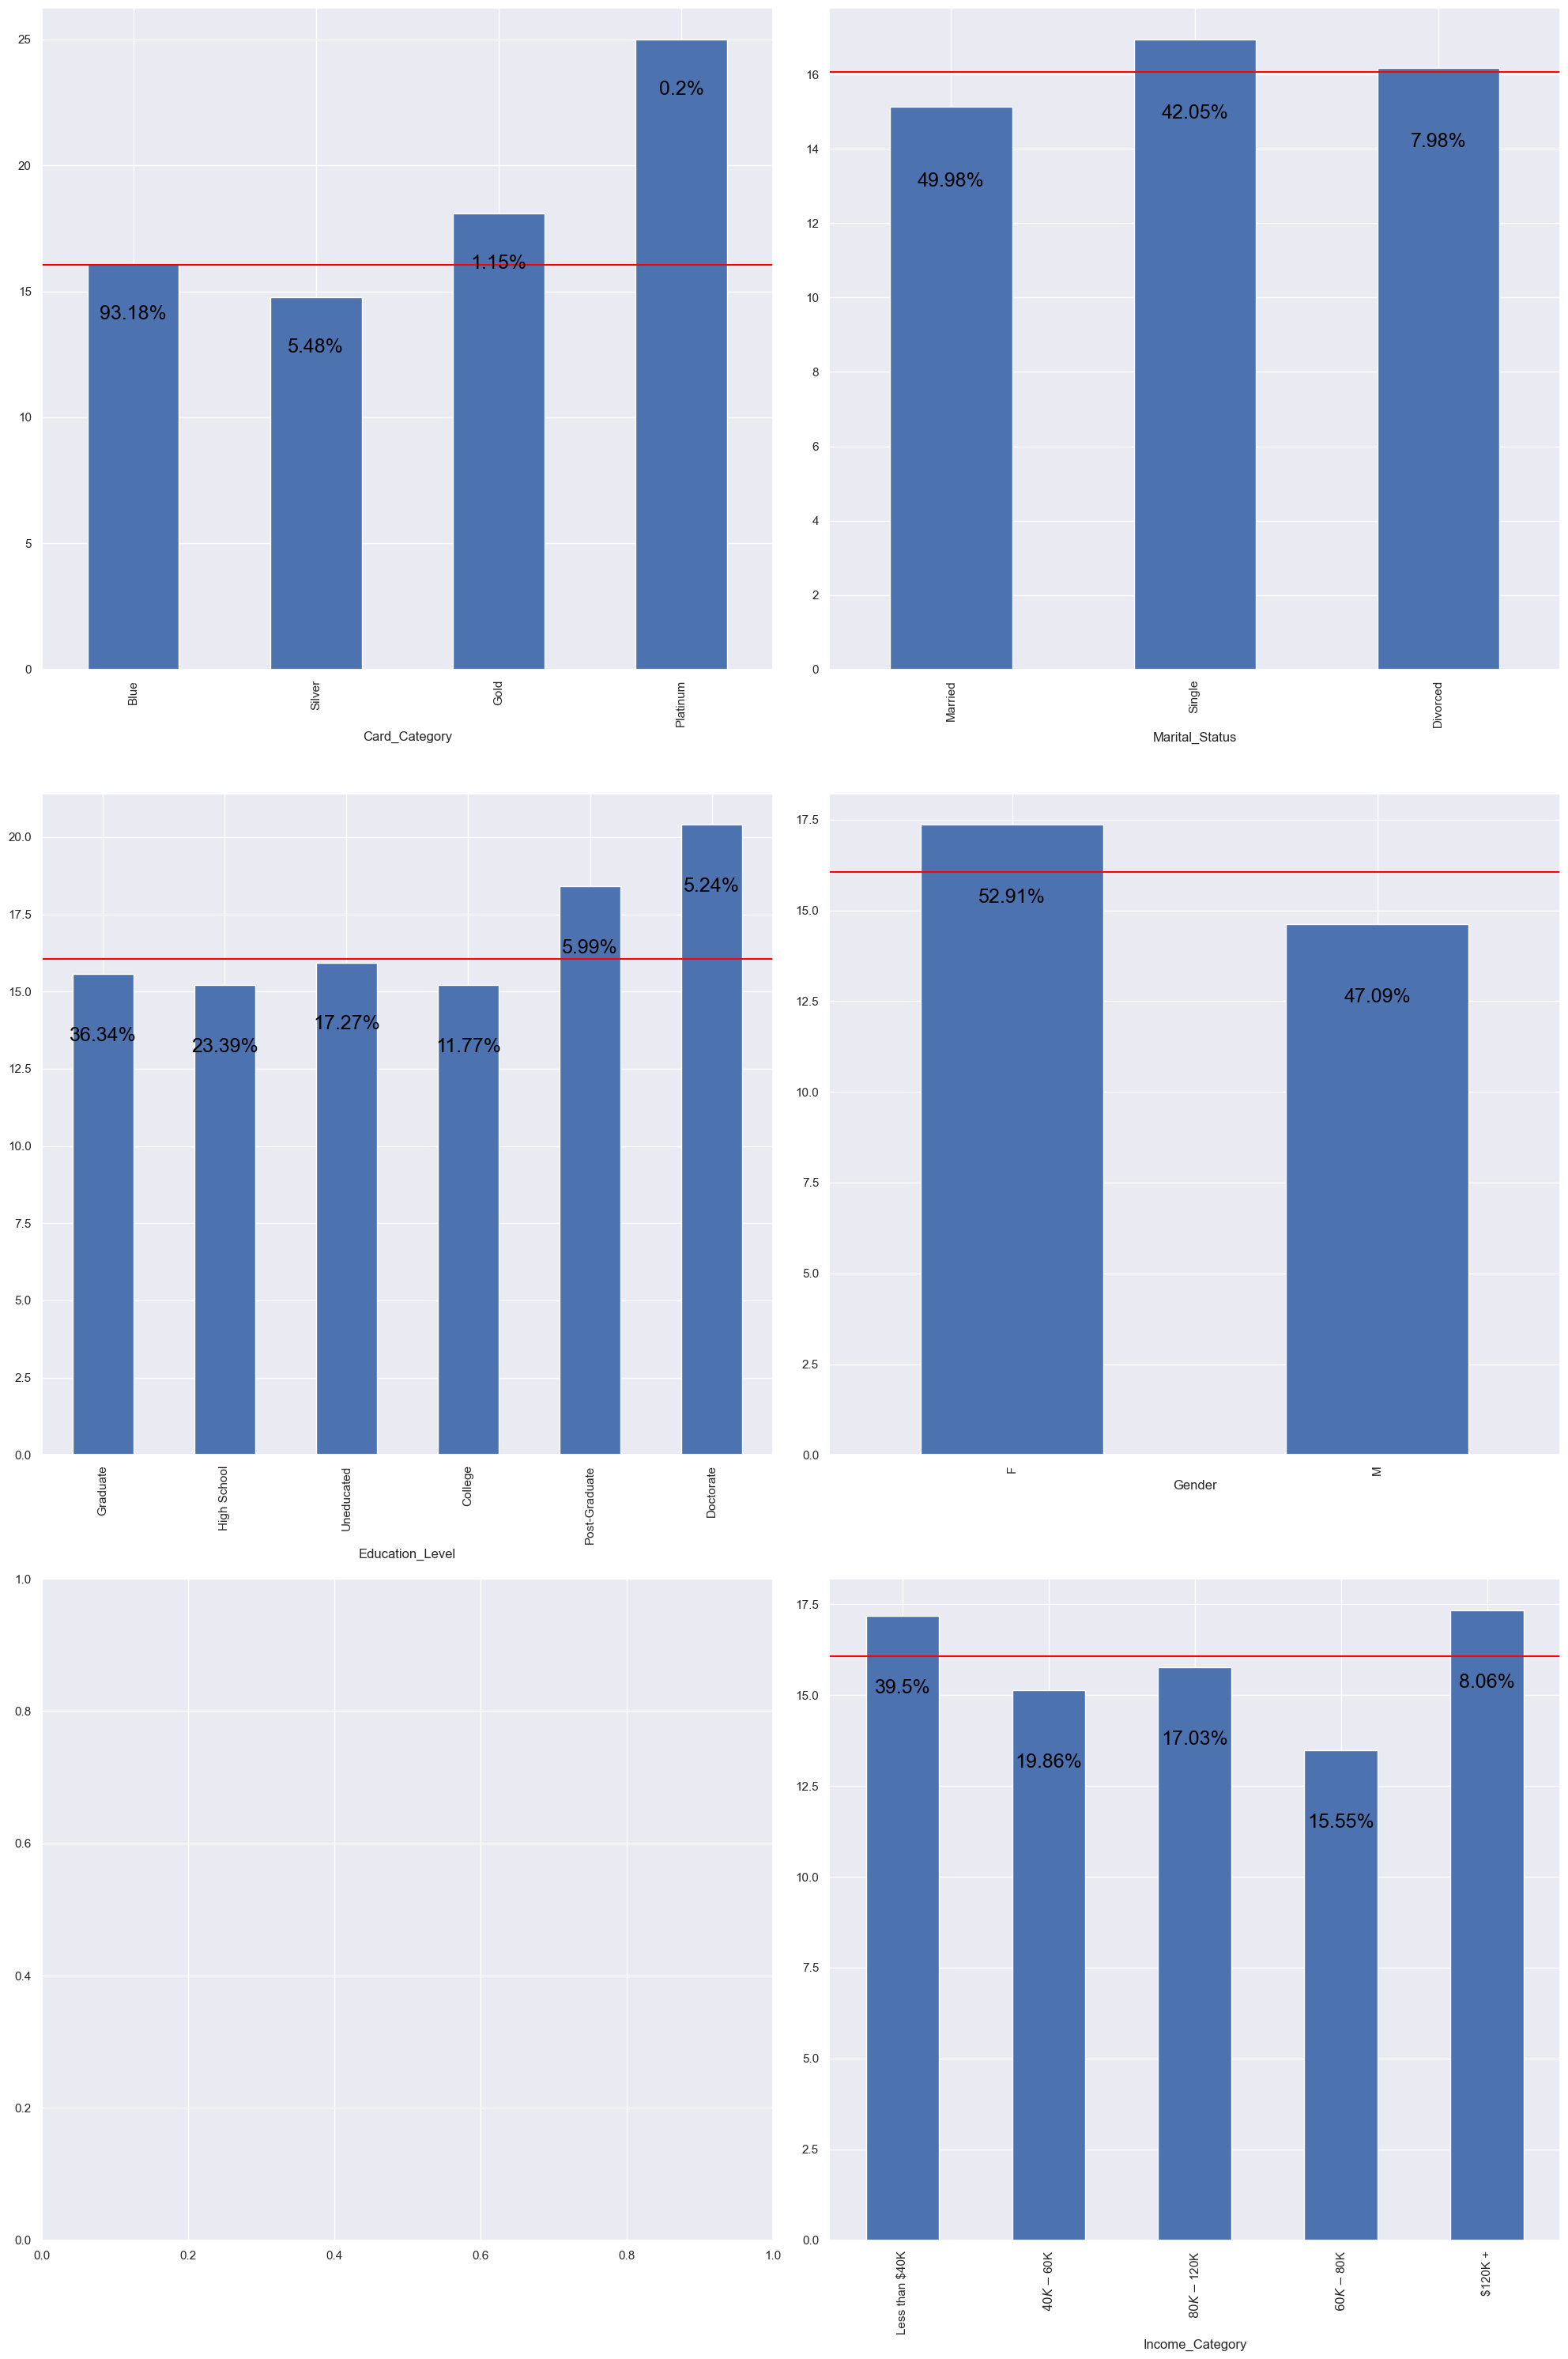

In [27]:
cat_tc_percentage(df, categorical_columns)

Some adjustments have been made to the data (irrelevant cols removed, unknowns replaced with na). We will save the modified data.

In [28]:
df.to_csv('data/processed/BankChurners_after-inspection.csv', index=False)


## CHECKPOINT 1

## Missing values imputation

As we saw in before, there were some 'unknown' values in categorical columns of the dataset.
We first changed the values to np.na and now we can use some missing values imputation methods to get rid of these unknown values. We will use decision tree and knn to impute the missing values. We will measure the performance of the two methods and choose the better one.

In [74]:
df = pd.read_csv('data/processed/BankChurners_after-inspection.csv')
df.head()
numerical_columns = df._get_numeric_data().columns.to_list()
categorical_columns = list(set(df.columns) - set(numerical_columns))
numerical_columns.remove('id')
categorical_columns_indices = [df.columns.get_loc(c) for c in categorical_columns if c in df]
numerical_columns_indices = [df.columns.get_loc(c) for c in numerical_columns if c in df]



In [75]:
df

id     Attrition_Flag  Customer_Age Gender  Dependent_count   
0          0  Existing Customer            45      M                3  \
1          1  Existing Customer            49      F                5   
2          2  Existing Customer            51      M                3   
3          3  Existing Customer            40      F                4   
4          4  Existing Customer            40      M                3   
...      ...                ...           ...    ...              ...   
10122  10122  Existing Customer            50      M                2   
10123  10123  Attrited Customer            41      M                2   
10124  10124  Attrited Customer            44      F                1   
10125  10125  Attrited Customer            30      M                2   
10126  10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category   
0         High School        Married     $60K - $80K          Blue  \
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School            NaN  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon   
0                  39  ...                       1                      3  \
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy   
0           12691.0                  777          11914.0  \
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct   
0                     1.335             1144              42  \
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              

The functions below aren't directly related to dealing with missing values, however the methods we use for imputation need some preprocessing since we train ML models to impute the data. Therefore, we declare these functions here and they will also be used later (when dealing with categorical data or normalizing numerical).

In [76]:
import json
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encode(_df, ommit_col=None):
    """
     returns encoded df and indices of columns that were encoded
    """
    encoded_df = _df.copy()
    encoded_df = encoded_df[encoded_df.notna()]
    f = open('data/utility/BankChurners_cat_cols_order.json')
    ordinal_mapping = json.load(f)
    sorted_features_list = []
    for col in ordinal_mapping:
        if col == ommit_col:
            continue
        sorted_features_list.append(ordinal_mapping[col])
    cols = list(ordinal_mapping.keys())
    if ommit_col in cols:
        cols.remove(ommit_col)
    encoder = OrdinalEncoder(categories=sorted_features_list)
    encoded_df[cols] = encoder.fit_transform(
        encoded_df[cols])
    return encoded_df

In [77]:
from sklearn.preprocessing import MinMaxScaler


def minmax_num_atts(_df, numeric):
    """
    applies minmaxscaler to numeric columns of data frame
    """
    df_norm = _df.copy()
    scaler = MinMaxScaler()
    df_norm.iloc[:, numeric] = scaler.fit_transform((df_norm.iloc[:, numeric]))
    return df_norm

In [78]:
df.isna().sum()

id                             0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [79]:
from sklearn.tree import DecisionTreeClassifier

def impute_missing_dtree(_df, col_names_to_impute):
    df = _df.copy()
    other_col_names = col_names_to_impute.copy()

    for currently_imputed_col_name in col_names_to_impute:
        impute_df = df.copy()
        other_col_names.remove(currently_imputed_col_name)
        # other columns with missing values will be temporary imputed with modes (categorical suited)
        for other_col_name in other_col_names:
            impute_df[other_col_name] = impute_df[other_col_name].fillna(impute_df[other_col_name].mode()[0])

        print(impute_df[currently_imputed_col_name].isna().sum())
        # preprocessing
        id_col = impute_df['id']
        currently_imputed_col_vals = impute_df[currently_imputed_col_name]
        # encode categorical
        impute_df = ordinal_encode(drop_col(impute_df, currently_imputed_col_name), currently_imputed_col_name)
        numerical_columns = impute_df._get_numeric_data().columns.to_list()
        num_indices = [impute_df.columns.get_loc(c) for c in numerical_columns if c in impute_df]
        impute_df = minmax_num_atts(impute_df, num_indices)
        impute_df = pd.get_dummies(drop_col(impute_df, currently_imputed_col_name))

        impute_df[currently_imputed_col_name] = currently_imputed_col_vals
        impute_df['id'] = id_col

        # select rows that dont contain na in the col that is being imputed to train dtree
        df_train = impute_df[impute_df[currently_imputed_col_name].notna()]
        target = df_train[currently_imputed_col_name]
        print(currently_imputed_col_name)

        df_train = drop_col(df_train, currently_imputed_col_name)
        df_train = drop_col(df_train, 'id')
        X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.2, random_state=5)

        # train tree TODO: some hyperparameter tuning (done manually)
        tree = DecisionTreeClassifier(min_samples_leaf=10, ccp_alpha=0.0007)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_train)
        print("Accuracy train:",metrics.accuracy_score(y_train, y_pred))
        y_pred = tree.predict(X_test)
        print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

        # tree will predict value on rows with missing values
        x_test = impute_df[impute_df[currently_imputed_col_name].isna()]
        x_test = drop_col(x_test, 'id')
        x_test = drop_col(x_test, currently_imputed_col_name)

        predicted = tree.predict(x_test)
        unique, counts = np.unique(predicted, return_counts=True)
        print(np.asarray((unique, counts)).T)
        x_test[currently_imputed_col_name] = predicted
        # update based on index
        df.update(x_test[currently_imputed_col_name])

    return df

In [80]:

df_imputed_dt = impute_missing_dtree(df, ['Education_Level', 'Marital_Status','Income_Category'])

1519
Education_Level
Accuracy train: 0.36407203020621554
Accuracy test: 0.3606271777003484
[['Graduate' 1519]]
749
Marital_Status
Accuracy train: 0.5967741935483871
Accuracy test: 0.5538379530916845
[['Married' 540]
 ['Single' 209]]
1112
Income_Category
Accuracy train: 0.6100942872989462
Accuracy test: 0.6001109262340544
[['$40K - $60K' 352]
 ['$60K - $80K' 16]
 ['$80K - $120K' 17]
 ['Less than $40K' 727]]


In [81]:

from sklearn.neighbors import KNeighborsClassifier

def impute_missing_knn(_df, col_names_to_impute):
    df = _df.copy()
    other_col_names = col_names_to_impute.copy()

    for currently_imputed_col_name in col_names_to_impute:
        impute_df = df.copy()
        other_col_names.remove(currently_imputed_col_name)
        # other columns with missing values will be temporary imputed with modes (categorical suited)
        for other_col_name in other_col_names:
            impute_df[other_col_name] = impute_df[other_col_name].fillna(impute_df[other_col_name].mode()[0])

        print(impute_df[currently_imputed_col_name].isna().sum())
        # preprocessing
        id_col = impute_df['id']
        currently_imputed_col_vals = impute_df[currently_imputed_col_name]
        # encode categorical
        impute_df = ordinal_encode(drop_col(impute_df, currently_imputed_col_name), currently_imputed_col_name)
        numerical_columns = impute_df._get_numeric_data().columns.to_list()
        num_indices = [impute_df.columns.get_loc(c) for c in numerical_columns if c in impute_df]
        impute_df = minmax_num_atts(impute_df, num_indices)
        impute_df = pd.get_dummies(drop_col(impute_df, currently_imputed_col_name))

        impute_df[currently_imputed_col_name] = currently_imputed_col_vals
        impute_df['id'] = id_col

        # select rows that dont contain na in the col that is being imputed to train dtree
        df_train = impute_df[impute_df[currently_imputed_col_name].notna()]
        target = df_train[currently_imputed_col_name]
        print(currently_imputed_col_name)
        df_train = drop_col(df_train, currently_imputed_col_name)
        df_train = drop_col(df_train, 'id')
        X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.2, random_state=5)

        knn = KNeighborsClassifier(n_neighbors=15)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_train)
        print("Accuracy train:",metrics.accuracy_score(y_train, y_pred))
        y_pred = knn.predict(X_test)
        print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

        # tree will predict value on rows with missing values
        x_test = impute_df[impute_df[currently_imputed_col_name].isna()]
        x_test = drop_col(x_test, 'id')
        x_test = drop_col(x_test, currently_imputed_col_name)

        predicted = knn.predict(x_test)
        unique, counts = np.unique(predicted, return_counts=True)
        print(np.asarray((unique, counts)).T)
        x_test[currently_imputed_col_name] = predicted
        # update based on index
        df.update(x_test[currently_imputed_col_name])

    return df

In [82]:
df_imputed_knn = impute_missing_knn(df, ['Education_Level', 'Marital_Status','Income_Category'])

1519
Education_Level
Accuracy train: 0.4080743537612547
Accuracy test: 0.30255516840882696
[['College' 63]
 ['Doctorate' 5]
 ['Graduate' 1082]
 ['High School' 264]
 ['Post-Graduate' 1]
 ['Uneducated' 104]]
749
Marital_Status
Accuracy train: 0.6131698213809651
Accuracy test: 0.5133262260127932
[['Divorced' 2]
 ['Married' 495]
 ['Single' 252]]
1112
Income_Category
Accuracy train: 0.610648918469218
Accuracy test: 0.5574043261231281
[['$120K +' 5]
 ['$40K - $60K' 102]
 ['$60K - $80K' 19]
 ['$80K - $120K' 18]
 ['Less than $40K' 968]]


The test accuracy was higher for the decision tree imputation method, hence we are going to continue with the dataframe produced by it.


In [38]:
df = df_imputed_dt

## Dealing with categorical features

We can observe there are some relationships among the values of some features. We can preserve the order using ordinal encoding.

Card category: Blue < Silver < Gold < Platinum

Income category: Less than '$40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +'

Education level: 'Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' < 'Doctorate'

In [39]:
df = ordinal_encode(df)


In [40]:
df.head()

id     Attrition_Flag  Customer_Age Gender  Dependent_count   
0   0  Existing Customer            45      M                3  \
1   1  Existing Customer            49      F                5   
2   2  Existing Customer            51      M                3   
3   3  Existing Customer            40      F                4   
4   4  Existing Customer            40      M                3   

   Education_Level Marital_Status  Income_Category  Card_Category   
0              1.0        Married              2.0            0.0  \
1              3.0         Single              0.0            0.0   
2              3.0        Married              3.0            0.0   
3              1.0        Married              0.0            0.0   
4              0.0        Married              2.0            0.0   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon   
0              39  ...                       1                      3  \
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1   
0       12691.0                  777          11914.0                 1.335  \
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In other categorical variables we can't clearly see any relationships (Gender or Marital status), hence we are going to use one hot encoding to transform them.

In [41]:
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'])

In [42]:
df

id     Attrition_Flag  Customer_Age  Dependent_count   
0          0  Existing Customer            45                3  \
1          1  Existing Customer            49                5   
2          2  Existing Customer            51                3   
3          3  Existing Customer            40                4   
4          4  Existing Customer            40                3   
...      ...                ...           ...              ...   
10122  10122  Existing Customer            50                2   
10123  10123  Attrited Customer            41                2   
10124  10124  Attrited Customer            44                1   
10125  10125  Attrited Customer            30                2   
10126  10126  Attrited Customer            43                2   

       Education_Level  Income_Category  Card_Category  Months_on_book   
0                  1.0              2.0            0.0              39  \
1                  3.0              0.0            0.0              44   
2                  3.0              3.0            0.0              36   
3                  1.0              0.0            0.0              34   
4                  0.0              2.0            0.0              21   
...                ...              ...            ...             ...   
10122              3.0              1.0            0.0              40   
10123              3.0              1.0            0.0              25   
10124              1.0              0.0            0.0              36   
10125              3.0              1.0            0.0              36   
10126              3.0              0.0            1.0              25   

       Total_Relationship_Count  Months_Inactive_12_mon  ...   
0                             5                       1  ...  \
1                             6                       1  ...   
2                             4                       1  ...   
3                             3                       4  ...   
4                             5                       1  ...   
...                         ...                     ...  ...   
10122                         3                       2  ...   
10123                         4                       2  ...   
10124                         5                       3  ...   
10125                         4                       3  ...   
10126                         6                       2  ...   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct   
0                     1.335             1144              42  \
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  Gender_M   
0                    1.625                  0.061     False      True  \
1                    3.714                  0.105      True     False   
2                    2.333                  0.000     False      True   
3                    2.333                  0.760      True     False   
4                    2.500                  0.000     False      True   
...                    ...                    ...       ...       ...   
10122                0.857                  0.462     False      True   
10123                0.683                  0.511     False      True   
10124                0.818                  0.000      True     False   
10125                0.722                  0.000     False 

Data are now preprocessed and can be used to train models.

In [43]:
df.to_csv('data/processed/BankChurners_after_preprocessing.csv', index=False)

## CHECKPOINT 2

### Model training

In [83]:
df = pd.read_csv('data/processed/BankChurners_after_preprocessing.csv')


In [283]:
RANDOM_STATE = 5
TARGET_COL_NAME = 'Attrition_Flag'


Main metric will be F1 macro since the dataset is imbalanced

In [284]:
def evaluate(truth, prediction, index):
    acc = metrics.accuracy_score(truth, prediction)
    f1 = metrics.f1_score(truth, prediction, average='macro')
    prec = metrics.precision_score(truth, prediction, average='macro')
    rec = metrics.recall_score(truth, prediction, average='macro')

    scores = pd.DataFrame({'F-score': [f1], 'Precision': [prec], 'Accuracy': [acc], 'Recall': [rec]}, index=[index])
    return scores

Split the data to training and testing sets

In [285]:
target = df[TARGET_COL_NAME]
df_train = drop_col(df, 'id')
df_train = drop_col(df_train, TARGET_COL_NAME)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=RANDOM_STATE)



### Random forest
Random forest v1: fitting the model (no oversampling, no hyperparameter tunning)

In [286]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
rf_scores_train = evaluate(y_train, y_pred, 'rf_train')
y_pred = clf.predict(X_test)
rf_scores_test = evaluate(y_test, y_pred, 'rf_test')


In [287]:
pd.concat([rf_scores_train, rf_scores_test], ignore_index=False, sort=False)

F-score  Precision  Accuracy    Recall
rf_train  1.00000   1.000000  1.000000  1.000000
rf_test   0.91529   0.935881  0.953791  0.897614

Which features were most important for the model


In [288]:
pd.DataFrame(clf.feature_importances_, index=df_train.columns).sort_values(by=0, ascending=False)


0
Total_Trans_Amt           0.188222
Total_Trans_Ct            0.158148
Total_Ct_Chng_Q4_Q1       0.114927
Total_Revolving_Bal       0.112310
Total_Relationship_Count  0.061656
Total_Amt_Chng_Q4_Q1      0.060624
Avg_Utilization_Ratio     0.058185
Credit_Limit              0.034814
Avg_Open_To_Buy           0.033551
Customer_Age              0.032912
Contacts_Count_12_mon     0.028187
Months_on_book            0.026884
Months_Inactive_12_mon    0.023799
Dependent_count           0.014102
Education_Level           0.011439
Income_Category           0.009474
Gender_M                  0.007632
Marital_Status_Married    0.007224
Gender_F                  0.006020
Marital_Status_Single     0.004761
Card_Category             0.003035
Marital_Status_Divorced   0.002094

Random forest v2: With SMOTE oversampling

In [289]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=RANDOM_STATE)
columns = X_train.columns
os_train_X, os_train_y = os.fit_resample(X_train, y_train)
os_train_X = pd.DataFrame(data=os_train_X, columns=columns )
os_train_y = pd.DataFrame(data=os_train_y, columns=[TARGET_COL_NAME])

print("Oversampled data length: ",len(os_train_y))
print("Attrited customers proportion: ",len(os_train_y[os_train_y['Attrition_Flag']=='Attrited Customer'])/len(os_train_X))

clf=RandomForestClassifier(random_state=RANDOM_STATE)
clf.fit(os_train_X, os_train_y)

y_pred = clf.predict(X_train)
os_rf_scores_train = evaluate(y_train, y_pred, 'os_rf_train')
y_pred = clf.predict(X_test)
os_rf_scores_test = evaluate(y_test, y_pred, 'os_rf_test')


Oversampled data length:  12808
Attrited customers proportion:  0.5


C:\Users\marti\AppData\Local\Temp\ipykernel_58680\2481468184.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(os_train_X, os_train_y)


In [290]:
pd.concat([os_rf_scores_train, os_rf_scores_test], ignore_index=False, sort=False)

F-score  Precision  Accuracy    Recall
os_rf_train  1.000000   1.000000  1.000000  1.000000
os_rf_test   0.930104   0.929714  0.960111  0.930495

Random forest v3: Hyperparameter tuning
Our classifier already produces feasible results, however there are some hyperparameters that can be used to train the model.  We haven't taken advantage of those and used the default values.
We are going to use cross-validation implementation - GridSearchCV, which tries all possible combinations of provided hyperparameters values.

In [106]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

Commented due to long execution time

In [107]:
# from sklearn.model_selection import GridSearchCV
# # Use the grid search to find the best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier(random_state=RANDOM_STATE)
# rf_gs = GridSearchCV(estimator = rf, param_grid = param_grid,
#                           cv = 5, n_jobs = -1, verbose = 2)
# rf_gs.fit(os_train_X, os_train_y)


In [108]:
# rf_gs.best_params_

The Grid Search cross validation is a very expensive method, therefore we are going to stick with RandomSearchCV which only tries some combinations of hyperparameters.
This way we won't test all the combinations, so we might not be able to find the best one, however the execution time will be shorter.

In [202]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 250, num = 10)]
n_estimators.append(100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

ccp_alpha = [0.0001, 0]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}



In [203]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='f1_macro', n_iter = 200, cv = 5, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)
rf_rs.fit(os_train_X, os_train_y)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\marti\G_DRIVE\skola\sem2\ML\project\venv\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0001, 0],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [15, 41, 67, 93, 119,
                                                         145, 171, 197, 223,
                                                         250, 100]},
                   random_state=5, scoring='f1_macro', verbose=2)

In [204]:
# Fit the random search model
y_pred = rf_rs.predict(X_train)
os_ht_rf_scores_train = evaluate(y_train, y_pred, 'os_ht_rf_train')

y_pred = rf_rs.predict(X_test)
os_ht_rf_scores_test = evaluate(y_test, y_pred, 'os_ht_rf_test')


In [205]:
pd.concat([os_ht_rf_scores_train, os_ht_rf_scores_test], ignore_index=False, sort=False)

F-score  Precision  Accuracy   Recall
os_ht_rf_train  1.000000   1.000000    1.0000  1.00000
os_ht_rf_test   0.930731   0.935184    0.9609  0.92643

In [342]:
rf_rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'ccp_alpha': 0,
 'bootstrap': False}

In [343]:
clf=RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=False, ccp_alpha=0.0000)
cor_train_X = drop_col(os_train_X, 'Credit_Limit')
cor_train_X = drop_col(cor_train_X, 'Total_Trans_Ct')
# cor_train_X = drop_col(cor_train_X, 'Avg_Open_To_Buy')
clf.fit(cor_train_X, os_train_y)

C:\Users\marti\AppData\Local\Temp\ipykernel_58680\3940352759.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(cor_train_X, os_train_y)


RandomForestClassifier(bootstrap=False, max_depth=30, random_state=5)

In [344]:
# Fit the random search model
# y_pred = clf.predict(X_train)
# a = evaluate(y_train, y_pred, 'os_ht_rf_train')

cor_test_X = drop_col(X_test, 'Credit_Limit')
cor_test_X = drop_col(cor_test_X, 'Total_Trans_Ct')
# cor_test_X = drop_col(cor_test_X, 'Avg_Open_To_Buy')
y_pred = clf.predict(cor_test_X)
b = evaluate(y_test, y_pred, 'os_ht_rf_test')


In [345]:
pd.concat([a, b], ignore_index=False, sort=False)

F-score  Precision  Accuracy    Recall
os_ht_rf_train  1.000000   1.000000  1.000000  1.000000
os_ht_rf_test   0.905983   0.918142  0.947867  0.894944